In [2]:
#Líneas a incluir en el documento .tex para eliminar la primera hoja (innecesaria porque el título en formato aparece en la segunda)
#\usepackage{atbegshi}
#\AtBeginDocument{\AtBeginShipoutNext{\AtBeginShipoutDiscard}}

\let\firstpage\relax

\makeatletter
\begin{center}

\begin{titlepage}

{\includegraphics[width=0.2\textwidth]{usblogo.png}\par} 
	{\bfseries\scshape\LARGE Universidad Simón Bolívar \par}
	{\scshape\large Dpto. de Tecnología y Electrónica \par}
	{\scshape\large EC7817 - Tópico especial II - Inteligencia Artificial en Biomédica \par}
    \vspace{0.2cm}

{\bfseries\scshape\LARGE \@title \par}

\vspace{0.2cm}
Autor: \@author

Profesor: Miguel Altuve

\vspace{0.2cm}

\@date

\let\newpage\relax	

\end{titlepage}

\end{center}

\makeatother


\vspace{1cm} 
\section*{\scshape\Large Introducción}

Utilice el conjunto de datos Basketball data set disponible en  http://sci2s.ugr.es/keel/dataset.php?cod=1293#sub1 para estudiar el aprendizaje automático no supervisado de tipo agrupamiento usando un modelo de conectividad (agrupamiento jerárquico) y un modelo de centroide (algoritmo k-means) y así realizar un análisis exploratorio de los datos.
La base de datos contiene:
\begin{itemize}
    \item[$\bullet$] 96 instancias: jugadores de baloncesto.
    \item[$\bullet$] 5 atributos:
    \begin{itemize}
        \item[$\bullet$] assists\_per\_minuteReal: número promedio de asistencias por minuto.
        \item[$\bullet$] heightInteger: altura del jugador (cm).
        \item[$\bullet$] time\_playedReal: tiempo jugado por el jugador (minutos).
        \item[$\bullet$] ageInteger: edad del jugador (años).
        \item[$\bullet$] points\_per\_minuteReal: número promedio de puntos por minuto.
    \end{itemize}
\end{itemize}
El objetivo del taller es estudiar el modelo de conectividad y el modelo de centroide. Para ello se utilizarán el agrupamiento jerárquico tipo aglomerativo y el algoritmo k-means. Además, se determinará el número de grupos “óptimos”, se interpretarán los resultados obtenidos y su utilidad como estrategia en el deporte analizado.

(2 punto) Estadísticas descriptivas de los datos
\begin{itemize}
    \item[$\bullet$] Describa estadísticamente el conjunto de observaciones.
    \item[$\bullet$] Obtenga los histogramas de las variables de entrada y analice si las observaciones provienen de una población con una distribución normal (Gaussiana).
    \item[$\bullet$] Obtenga los diagramas de dispersión
    \item[$\bullet$] Examine la dependencia entre las variables de entrada a partir del coeficiente de correlación de Pearson.
\end{itemize}

(3 puntos) Agrupamiento jerárquico (modelo de conectividad)
\begin{itemize}
    \item[$\bullet$] Utilice el algoritmo de agrupamiento jerárquico aglomerativo para agrupar los datos.
    \item[$\bullet$] Grafique el dendograma.
    \item[$\bullet$] Decida sobre el número óptimo de grupos de acuerdo a la técnica vista en clase basada en la distancia en el dendograma.
    \item[$\bullet$] Interprete los resultados obtenidos.
\end{itemize}

(3 puntos) Agrupamiento con k-means (modelo de centroide)
\begin{itemize}
    \item[$\bullet$] Utilice el algoritmo k-means para agrupar los datos
    \item[$\bullet$] Grafique los clústeres en 2D (escoja las variables)
    \item[$\bullet$] Utilice la técnica del codo para decidir el número óptimo de grupos
    \item[$\bullet$] Grafique el coeficiente de silueta
    \item[$\bullet$] Interprete los resultados obtenidos
\end{itemize}  

Conclusión
Concluya sobre el taller
¿Cuál técnica le parece mejor para representar los grupos de acuerdo a la aplicación estudiada (baloncesto)?

(2 punto) Aplicaciones de agrupamiento
\begin{itemize}
    \item[$\bullet$] Describa una aplicación que considere relevante de agrupamiento jerárquico y otra aplicación de agrupamiento con k-means. Explique cómo la técnica fue aplicada, qué se logró, cuáles beneficios trajo el resultado, etc.
\end{itemize}

In [3]:

# Se instancian las bibliotecas a implementar

import numpy as np
#import csv
#import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
#import statistics as stats

import scipy
from scipy import stats
import scipy.cluster as scpcl
import scipy.cluster.hierarchy as scpch
#from scipy.cluster.hierarchy import dendrogram
#from scipy.stats import boxcox
#from scipy.special import inv_boxcox

import sklearn
import sklearn.model_selection as sklms
import sklearn.linear_model as skllm
import sklearn.metrics as sklmt
import sklearn.neural_network as sklnn
import sklearn.cluster as sklcl
#from sklearn import cross_validation
#import sklearn.cross_validation as sklcv 
#from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import train_test_split

from prettytable import PrettyTable

#format of print for numpy float
np.set_printoptions(precision = 5, formatter = {'float_kind': lambda x: "{0:0.5f}".format(x)}, threshold = 40, edgeitems = 20)


In [187]:

# Configuration to display center plots

from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


\vspace{1cm} 
\subsection*{\scshape\large Funciones implementadas a lo largo del código}

In [5]:

# presentar datos de la data

def printDataInfo(data, name):
    print('Tamaño de la data ' + name)
    print('Cantidad de muestras: ', np.size(data,0))
    print('Número de Atriutos de cada muestra: ', np.size(data,1))


#endfunction


In [6]:

# Cálculo de los Parámetros estadísticos de interés

def StatsVars( data, title ):
    

    # Inicialización

    data_Mean = np.zeros((np.size(data,1),1))       #media
    data_Median = np.zeros((np.size(data,1),1))     #mediana
    data_Mode = np.zeros((np.size(data,1),1))       #moda
    data_Max = np.zeros((np.size(data,1),1))        #máximo
    data_Min = np.zeros((np.size(data,1),1))        #mínimo
    data_Range = np.zeros((np.size(data,1),1))      #rango
    data_Desv = np.zeros((np.size(data,1),1))       #desviación
    data_Skew = np.zeros((np.size(data,1),1))       #asimetría
    data_Kurt = np.zeros((np.size(data,1),1))       #curtosis
    

    # cálculo de los parámetros estadísticos

    data_Mean = np.mean(data, axis = 0)
    data_Median = np.median(data, axis = 0)
    data_Mode = stats.mode(data, axis = 0)
    data_Max = np.max(data, axis = 0)
    data_Min = np.min(data, axis = 0)
    data_Range = data_Max - data_Min
    data_Desv = np.std(data, axis = 0)
    data_Skew = stats.skew(data, axis = 0, bias = 0)
    data_Kurt = stats.kurtosis(data, axis = 0, bias = 0)
    
    # Se inserta el formato de presentación de los datos
    np.set_printoptions(formatter={'float': lambda x: "{:.5e}".format(x)}, suppress= True)
    
    # Presentación de los valores de los parámetros estadísticos estudiados

    print('la media de los atributos para la ' + title + ' es:');
    print(data_Mean);
    print();
    print('la mediana de los atributos para la ' + title + ' es:');
    print(data_Median);
    print();
    print('la moda de los atributos para la ' + title + ' es:');
    print(data_Mode);
    print();
    print('el valor máximo de los atributos para la ' + title + ' es:');
    print(data_Max);
    print();
    print('el valor mínimo de los atributos para la ' + title + ' es:');
    print(data_Min);
    print();
    print('lel rango de los atributos para la ' + title + ' es:');
    print(data_Range);
    print();
    print('la desviación estándar de los atributos para la ' + title + ' es:');
    print(data_Desv);
    print();
    print('la asimetría de los atributos para la ' + title + ' es:');
    print(data_Skew);
    print();
    print('el curtosis de los atributos para la ' + title + ' es:');
    print(data_Kurt);
    print();

    
    # retorna las variables estadísticas de interés
    
    return data_Mean, data_Median, data_Mode, data_Max, data_Min, data_Range, data_Desv, data_Skew, data_Kurt;

#endfunction
    

In [7]:

# Plot de los histogramas de cada atributo por separado

def histogrmAllAtriSep( data, varnames, title ):

    # Se muestran los histogramas

    for i in range( np.size(data,1) ):

        # Atributo i
        #print( title + " - Atributo " + str(i+1)+": " + varnames[i] + ' de la célula '+ str(int(np.floor(i/10)) + 1) )
        fig = plt.figure(figsize =(10, 2))
        
        #gráficos de histogramas
        plt.hist( data[:,i] , bins = 'auto' , color = 'm');
        plt.title( title + '\nHistograma del atributo '+ str(i+1) + ': ' + varnames[i] );

        # Add x, y gridlines
        plt.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.35)
        
        # y axis configuration
        plt.yticks( np.arange(0, np.max (plt.yticks()[0]), 10 ) )
        
        # plot
        plt.show()

    #endfor
    
#endfunction


In [8]:

# Scatter Plot de los atributos respecto a un atributo (atributo de salida)

def ScatterPlotAllto1Sep( data, varnames, title ):

    # Scatter plot de los atributos de entrada vs el atributo de salida

    for i in range( np.size(data[:,1:],1) ):
        
        # inicializa la figura
        fig = plt.figure(figsize = (10, 1.25))
        
        # scatter plot
        plt.scatter( data[:, i+1] , data[:, 0] , color = 'g')
        
        # title & labels
        plt.title( title + "\n" + varnames[0] + " VS Atributo " + str(i+1)+": " + varnames[i+1] )
        plt.xlabel("Atributo " + str(i+1)+": " + varnames[i+1])
        plt.ylabel('Diagnóstico')
        
        # plot
        plt.show()
    
    #endfor
    
#endfunction


In [9]:

# Scatter Plot de los atributos respecto a un atributo (atributo de salida)

def ScatterPlotAlltoAll( data, varnames, title ):
    
    # Scatter plot de los atributos de entrada vs el atributo de salida

    j = 0
    i = 0
    while j < np.size(data[:,1:],1):
        
        # inicializa la figura
        fig = plt.figure(figsize = (8, 3))
        
        # scatter plot
        plt.scatter( data[:, i+1] , data[:, j] , color = 'g')
        
        # title & labels
        plt.title( title + "\n" + varnames[j] + " VS Atributo " + ": " + varnames[i+1] )
        plt.xlabel("Atributo " + ": " + varnames[i+1])
        plt.ylabel('Diagnóstico')
        
        # plot
        plt.show()
        
        j += np.floor_divide( i+1, np.size(data[:,1:],1) )
        i = np.remainder( i+1, np.size(data[:,1:],1) ) + j * np.floor_divide( i+1, np.size(data[:,1:],1) )
        
    #endwhile
    
#endfunction

In [10]:

# Plot para una sola correlación de las datos (los atributos de entrada respecto al atributo de salida.)

def barPlotSimp( corr_data , varnames , title ):
    
    # Bar Plot de la correlación de los atributos

    #Figure size
    fig, ax = plt.subplots(figsize = (12, 4))

    # Bar Plot
    ax.bar(list(varnames[1:]), list(corr_data), width = 0.75, color='c');

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.35)

    # Add annotation to bars
    j = 0
    for i in ax.patches:
        plt.text(i.get_x() + 0.2, i.get_y() + np.round( np.max( corr_data ), 1 ) + 0.1, str( np.round( corr_data[j] , 5 ) ), fontsize = 10, fontweight ='bold', color ='black');
        j = j + 1

    # Plot title
    ax.set_title( title  + ' - Nivel de Correlación entre los atributos con el atributo ' + varnames[0])

    # axis labels
    #plt.xticks(np.arange( np.size(varnames[1:11],0) ), varnames[1:11])
    plt.xticks( varnames[1:] )

    # y axis configuration
    ax.set_yticks( np.arange( np.round(np.min(corr_data)-0.05,1), 1.25, 0.1 ) )
    ax.set_ylabel('Correlación con el atributo '+varnames[0])
    ax.set_xlabel('Atributos de entrada')

    #fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12, color ='grey', ha ='right', va ='bottom', alpha = 0.7)

    # plot
    plt.show()

#endfunction


In [11]:

# Plot para una sola correlación de las datos (los atributos de entrada respecto al atributo de salida.)

def barPlotAlltoAll( corr_data , varnames , title ):
    
    # Bar Plot de la correlación de los atributos
    for i in range ( np.size(corr_data,1) ):
        
        # Se acomodan cada variables para cada iteración
        corr_data_aux = np.delete( corr_data[:,i], i, 0 )
        varnames_aux = np.hstack( ( varnames[i], np.delete(varnames, i, 0) ) )
        
        # se presentan los gráficos de barra de la correlación de todos los atributos con el atributo i.
        barPlotSimp( corr_data_aux , varnames_aux , title )
        
    #endfor

#endfunction



In [12]:

def IQRparamCalc( data ):

    # Obtención de variables de IQR

    dataQ1 = np.percentile(data, 25, axis = 0)
    dataQ2 = np.percentile(data, 50, axis = 0)
    dataQ3 = np.percentile(data, 75, axis = 0)

    dataIQR = stats.iqr(data, axis = 0)
    

    # Se inserta el formato de presentación de los datos
    np.set_printoptions(formatter={'float': lambda x: "{:.5e}".format(x)}, suppress= True)
    
    #Presentación de los parámetros IQR

    print('Q1 de los atributos es:');
    print(dataQ1);
    print();
    print('Q2 de los atributos es:');
    print(dataQ2);
    print();
    print('Q3 de los atributos es:');
    print(dataQ3);
    print();
    print('IQR de los atributos es:');
    print(dataIQR);
    print();

    return dataQ1, dataQ2, dataQ3, dataIQR

#endfunction


In [13]:

def AtipValueRemv( data ):

    # Obtención de variables de IQR

    dataQ1 = np.percentile(data, 25, axis = 0)
    #dataQ2 = np.percentile(data, 50, axis = 0)
    dataQ3 = np.percentile(data, 75, axis = 0)

    dataIQR = stats.iqr(data, axis = 0)


    # Detector de valores atípicos por debajo del límite inferior
    aux1 = data < ( dataQ1 - 1.5 * dataIQR ) * np.ones( (np.size(data,0),np.size(data,1)) )
    aux1 = np.sum(aux1, axis = 1)

 
    # Detector de valores atípicos por encima del límite supeior
    aux2 = data > ( dataQ3 + 1.5 * dataIQR ) * np.ones( (np.size(data,0),np.size(data,1)) )
    aux2 = np.sum(aux2, axis = 1)


    # Extracción de las muestras con valores atípicos
    return np.copy(data[ (aux1 == 0) & (aux2 == 0), :])

#endfunction


In [14]:

# BoxPlot de todos los atributos en una misma figura

def BoxPlotAllin1( data, varnames, title ):


    # Se inicializan los diagrama de bloques
    stats2 = cbook.boxplot_stats(data, labels = varnames)

    #fig, ax = plt.subplots(1, 1)
    fig = plt.figure(figsize =( 12, np.size( data,1 ) ))
    ax = fig.add_subplot(111)

    # Plot boxplots from our computed statistics
    bp = ax.bxp([stats2[i] for i in range( np.size(data,1) )], positions=range( np.size(data,1) ), patch_artist = True, vert = 0, shownotches ='True');


    colors = ['#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
              '#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
              '#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
              '#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
              '#0000FF', '#00FF00']

    
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        
    #endfor

    # changing color and linewidth of
    # whiskers
    for whisker in bp['whiskers']:
        whisker.set(color ='#8B008B',
                    linewidth = 2,
                    linestyle =":")
    #endfor

    # changing color and linewidth of
    # caps
    for cap in bp['caps']:
        cap.set(color ='#8B008B',
                linewidth = 1)
    #endfor

    # changing color and linewidth of
    # medians
    for median in bp['medians']:
        median.set(color ='#777777', 
                   linewidth = 1)
    #endfor

    # changing style of fliers
    for flier in bp['fliers']:
        flier.set(marker ='D',
                  color ='#e7298a',
                  alpha = 0.25)
    #endfor
    
    # Title
    ax.set_title(title + ' - Diagrama de Cajas (IQR)')

#endfunction



In [15]:

# BoxPlot de todos los atributos en figuras independientes

def BoxPlotSep( data, varnames, title ):
    
    
    for i in range( np.size(data,1) ):

        # Atributo i
        #print( "Atributo " + str(i+1)+": " + varnames[i] + ' de la célula '+ str(int(np.floor(i/10)) + 1) )

        # inicializa las cajas
        stats2 = cbook.boxplot_stats(data[:, i ])#, labels = varnames[i+1])

        # instancia la figura
        fig = plt.figure(figsize =(10, 1))
        ax = fig.add_subplot(111)

        # boxplot
        bp2 = ax.bxp(stats2, patch_artist = True, vert = 0, shownotches ='True');

        # configurar el color de las cajas
        
        
        colors = ['#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
                  '#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
                  '#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
                  '#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
                  '#0000FF', '#00FF00']
        
        bp2['boxes'][0].set(color = colors[i])

        # título
        plt.title(title + '\nDiagrama IQR del atributo '+str(i+1) + ': ' + varnames[i] + ' de la célula '+ str(int(np.floor(i/10)) + 1) );
        
        # plot
        plt.show()
    
    #endfor
    
#endfunction


In [16]:

# Definición de la función de transformación Box-Cox para arreglos de 2D

def boxcox_transform( Data_array ):
    
    Data_lambdas = np.zeros( (np.size(Data_array,1)) )
    
    for i in range( np.size( Data_array, 1 ) ):
        Data_array[:, i], Data_lambdas[i] = stats.boxcox( Data_array[:, i] )
        
    #endfor
    
    # function results
    return Data_array, Data_lambdas

#endfunction


In [17]:

# Definición de la función de transformación Yoe-Johnson para arreglos de 2D

def yoejohnson_transform( Data_array , Lmbdas = None ):

    Data_lambdas = np.zeros( np.size( Data_array, 1 ) )
    
    if np.sum(Lmbdas) is None:
        for i in range( np.size( Data_array, 1 ) ):
            Data_array[:, i], Data_lambdas[i] = stats.yeojohnson( Data_array[:, i] )
        
        #endfor
        
    else:
        for i in range( np.size( Data_array, 1 ) ):
            Data_array[:, i]  = stats.yeojohnson( Data_array[:, i] , lmbda = Lmbdas[i] )
        
        #endfor
        Data_lambdas = Lmbdas
        
    #endif
    
    # function results
    return Data_array, Data_lambdas

#endfunction


In [18]:

# Hierachical Clustering Function
def hierarchicalClustering( data, Nclusters=2, Affinity='euclidean', ComputeFullTree='auto', Linkage='ward', DistanceThreshold=None, ComputeDistances=True ):
    
    model = sklcl.AgglomerativeClustering( n_clusters=Nclusters, affinity=Affinity, compute_full_tree=ComputeFullTree, linkage=Linkage, distance_threshold=DistanceThreshold, compute_distances=ComputeDistances )
    model.fit( data )
    
    return model

#endfunction


In [19]:

def DendrogramAggloH(model, title, **kwargs):

    fig = plt.figure( figsize = ( 15, 10 ) )
    
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = model.distances_
    
    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    scpch.dendrogram(linkage_matrix, **kwargs)
    
    # identify the max distance diference between 2 graphs
    ddist = model.distances_ - np.hstack((0, model.distances_[:-1]))
    maxDDistPos = ( ddist == np.max(ddist) ) * np.arange(np.size(model.distances_))
    ind = maxDDistPos[maxDDistPos != 0]
    
    # specifying horizontal line type
    if ind.size > 0:
        plt.axhline(y = model.distances_[ind-1], color = 'm', linestyle = '--')
        plt.axhline(y = model.distances_[ind], color = 'm', linestyle = '--')
    
    
    plt.title(title)
    plt.show()
    
    return linkage_matrix
    
#endfunction


In [20]:

def DendogramLinkage( data, title, Method='ward', Metric='euclidean' ):

    fig = plt.figure( figsize = ( 15, 10 ) )
    
    # hierarchical glustering model: Linkage
    model = scpch.linkage(data , method=Method, metric=Metric )
    
    # Dendrogram plot
    scpch.dendrogram( model )
        
    # identify the max distance diference between 2 graphs
    ddist = model[:,2] - np.hstack((0, model[:-1,2]))
    maxDDistPos = ( ddist == np.max(ddist) ) * np.arange(np.size(model[:,2]))    
    ind = maxDDistPos[maxDDistPos != 0]
    
    # specifying horizontal line type
    if ind.size > 0:
        plt.axhline(y = model[ind-1,2], color = 'm', linestyle = '--')
        plt.axhline(y = model[ind,2], color = 'm', linestyle = '--')
    
    plt.title(title)
    plt.show()
    
    return model
    
#endfunction


In [161]:
def KMeansCodo( data, Nclusters, Init='k-means++', Ninit=10, maxIter=300, verbose=0, randomState=None, Algorithm='auto' ):
    
    
    kmodel = np.empty(( np.size(Nclusters,0),), dtype=object)
    #kmodel[:] = ModelsInfo()
    
    KMdist = np.zeros( np.size(Nclusters,0) )
    silhouetteMetric = np.zeros( np.size(Nclusters,0) )
    
    for i in range( np.size(Nclusters,0) ):
    
        kmodel[i] = ModelsInfo()
        
        kmodel[i].model_ = sklcl.KMeans(n_clusters=Nclusters[i], init=Init, n_init=Ninit, max_iter=maxIter, random_state=randomState, algorithm=Algorithm)
        
        kmodel[i].model_.fit( data )
        
        KMdist[i] = kmodel[i].model_.inertia_
        
        silhouetteMetric[i] = sklmt.silhouette_score( data, kmodel[i].model_.labels_, metric='euclidean' )
        
    #endfor

    
    # Plot silhouette metric
    # create the figure
    fig = plt.figure( figsize = (12,5) )
    
    # plot
    plt.plot( Nclusters, silhouetteMetric, linestyle = '-.' )
    plt.grid( True )
    
    # title and labels
    plt.title('coeficiente de silueta - '+ title)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette metric')
    plt.xticks( np.arange( np.size(Nclusters,0) +2 ) )
    
    
    # Plot the cdist
    # create the figure
    fig = plt.figure( figsize = (12,5) )
    
    # plot
    plt.plot( Nclusters, KMdist )
    plt.grid( True )
    
    # title and labels
    plt.title('mínimo valor de la suma de distancia al cuadrago por grupo - ' + title)
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared distances')
    plt.xticks( np.arange( np.size(Nclusters,0) +2 ) )
    
    
    return kmodel, silhouetteMetric
    
#endfunction

In [222]:

# Scatter Plot KKMeans results
def KmScatterPlot( data, label, centroids, title, varnames ):
    
    
    u_labels = np.unique(label)
    
    
    #plotting the results:
    
    fig = plt.figure( figsize = (12,5) )
    
    color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    for i in u_labels:
        plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i+1, c = color[i] )
        plt.scatter( centroids[i,0] , centroids[i,1] , s = 120, marker='X', edgecolor='k', c = color[i] )
    
    #plt.scatter( centroids[:,0] , centroids[:,1] , s = 80, color = 'k' )
    plt.legend()
    plt.title( title + ": " + varnames[1] + " vs " + varnames[0] )
    plt.xlabel( varnames[0] )
    plt.ylabel( varnames[1] )
    plt.show()
    
    
    
#endfunction


\vspace{1cm} 
\subsection*{\scshape\large Clases creadas}

In [22]:

# El objetivo de esta clase es añadirle atributos adicionales a los arreglos numpy de relevancia para el estudio
# como lo son las variables estadísticas de interés.

class StatsArr(np.ndarray):
    
    def __new__(cls, input_array, mean_=None, median_=None, mode_=None, max_=None, min_=None, range_=None, desv_=None, 
                skew_=None, kurt_=None, dataCorr_=None, Q1_=None, Q2_=None, Q3_=None, IQR_=None, TransfType_=None, 
                Lambdas_=None):
        # Input array is an already formed ndarray instance
        # We first cast to be our class type
        obj = np.asarray(input_array).view(cls)
        # add the new attribute to the created instance
        obj.mean_ = mean_
        obj.median_ = median_
        obj.mode_ = mode_
        obj.max_ = max_
        obj.min_ = min_
        obj.range_ = range_
        obj.desv_ = desv_
        obj.skew_ = skew_
        obj.kurt_ = kurt_
        obj.dataCorr_ = dataCorr_
        obj.Q1_ = Q1_
        obj.Q2_ = Q2_
        obj.Q3_ = Q3_
        obj.IQR_ = IQR_
        obj.Transftype_ = TransfType_
        obj.Lambdas_ = Lambdas_
        # Finally, we must return the newly created object:
        return obj
    
    #endfunction

    def __array_finalize__(self, obj):
        # see InfoArray.__array_finalize__ for comments
        if obj is None: return
        self.mean_   = getattr(obj, 'mean_', None)
        self.median_ = getattr(obj, 'median_', None)
        self.mode_   = getattr(obj, 'mode_', None)
        self.max_    = getattr(obj, 'max_', None)
        self.min_    = getattr(obj, 'min_', None)
        self.range_  = getattr(obj, 'range_', None)
        self.desv_   = getattr(obj, 'desv_', None)
        self.skew_   = getattr(obj, 'skew_', None)
        self.kurt_   = getattr(obj, 'kurt_', None)
        self.dataCorr_ = getattr(obj, 'dataCorr_', None)
        self.Q1_ = getattr(obj, 'Q1_', None)
        self.Q2_ = getattr(obj, 'Q2_', None)
        self.Q3_ = getattr(obj, 'Q3_', None)
        self.IQR_ = getattr(obj, 'IQR_', None)
        self.TransfType_ = getattr(obj, 'TransfType_', None)
        self.Lambdas_ = getattr(obj, 'Lambdas_', None)
        # We do not need to return anything
    
    #endfunction
    
#endclass

In [23]:

# Clase que almacena los datos de interés del modelo
class ModelsInfo:
    
    def __init__(self, model_=None, RSSent_=None, RSSeva_=None, R2ent_=None, R2eva_=None, Betas_=None, R2CValScore_=None, RSS_=None, R2_=None, Out_=None):
        
        self.model_ = model_
        self.RSSent_ = RSSent_
        self.RSSeva_ = RSSeva_
        self.R2ent_ = R2ent_
        self.R2eva_ = R2eva_
        self.Betas_ = Betas_
        self.R2CValScore_ = R2CValScore_
        self.RSS_ = RSS_
        self.R2_ = R2_
        self.Out_ = Out_
        
    #endfunction
    
#endclass


\newpage

\vspace{1cm} 
\section{\scshape\large Aplicaciones de Agrupamiento}

El agrupamiento resulta ser de mucha utilidad para diferentes áreas. a continuación, se presentará un ejemplo para cada uno de los dos métodos a estudiar en el presente escrito: Agrupamiento Jerárquico y el método K-Means.

\vspace{1cm} 
\subsection{\scshape\large Aplicaciones 1: Agrupamiento Jerárquico}

\vspace{1cm} 
\subsubsection{\scshape\large The Application of Hierarchical Clustering Algorithms for Recognition Using Biometrics of the Hand }

En este trabajo se hizo uso del agrupamiento jerárquico con el método SEP/COP (SEP signsifica Search over Extended Partition set; y COP significa  "Context-independent Optimality" and "partiality"), que resulta ser una mejorado para la selección de los grupos presentes en el dendrograma de acuerdo a las distancias más largas entre clusters de diferentes ramas; y data de manos reales de Bosphorus Hand Database para desarrollar un algoritmo que pudiera identificar personas a partir de patrones biométricos de las manos de cada individuo.

En este trabajo se comparó el método tradicional de agrupamiento jerárquico versus el método SEP/COP para clasifica la data de biometría de la forma de la mano. Los resultados de la simulación muestran que la metodología SEP/COP arroja mejores resultados que los criterios tradicionales de selección de grupos del dendrograma, logrando un 99,16% de exactitud de una data de 20, 35, 50 y 100 personas. Con estos resultados, muestran que este algoritmo como identificador de rasgos biométricos pudiera ser usado para responder a la demanda de mecanismos de seguridad informáticos.

\href{https://www.researchgate.net/publication/301691212_The_Application_of_Hierarchical_Clustering_Algorithms_for_Recognition_Using_Biometrics_of_the_Hand}{referencia del trabajo}

\vspace{1cm} 
\subsection{\scshape\large Aplicaciones 2: K-Means}

\vspace{1cm} 
\subsubsection{\scshape\large Optimization of a Truck-drone in Tandem Delivery Network Using K-means and Genetic Algorithm}

En este trabajo, el algoritmo k-means se usó para determinar las mejores posiciones de los k centroides, correspondientes a las ubicaciones de los truck launch, basado en la mejor posición para reducir la distancia a los destinos (delivery location). El objetivo es optimizar los tiempos de entrega de paquetes, planteando como solución el mover un lote de paquetes con un camión (truck) hasta cierto punto y que, a partir de dicho punto, desde el camión despegan drones que llevan un paquete a un cliente en particular.

La primera fase asigna ubicaciones de entrega al grupo más cercano (centroide) de una sola vez y luego vuelve a calcular los centroides. La Fase I generalmente da como resultado un mínimo local subóptimo, pero brinda buenos centroides candidatos para la inicialización y la Fase II. La segunda fase utiliza actualizaciones 'en línea' mediante las cuales los puntos candidatos se reasignan a diferentes centroides si el acto de reasignación reduce el costo.

En este trabajo se tomaron diferentes configuraciones de número y velocidad de drones, número y velocidad del camión, espacio de operación, entre otros, y se desarrollaron una expresión matemática para estimar el número de centroides, k, óptimos, la cual se muestra a continuación.
\begin{align*}
    k_{optimal} = 0.6605 \, {\left(  \frac{ {OperatingSpace}^{ \frac{1}{3} } \, Customers }{ Drones \left( \frac{ {drone}_{speed} }{ {Truck}_{speed} } \right)} \right)} ^ {0.8623}
\end{align*}
En este trabajo lograron demostrar una ligera reducción en los tiempos de entrega proporcional a la cantidad de drones en el camión, así como una reducción sustancial en el consumo energético del sistema. El uso del algoritmo K-Means, junto con otras técnicas de optimización, permitió resolver el problema de ubicación de los centroides (stop/ drone launch locations) para más de 200 clientes simultáneamente.

\href{https://upcommons.upc.edu/bitstream/handle/2117/88986/1929-8707-1-pb.pdf?sequence=1&isallowed=y} {referencia del trabajo}

\newpage

\vspace{1cm} 
\section{\scshape\large Información relevante de la base de datos}

In [24]:
# Se carga la data
data0 = np.loadtxt("basketball.dat", dtype = str, delimiter =",")
printDataInfo(data0, 'Data Jugadores de Basket')

Tamaño de la data Data Jugadores de Basket
Cantidad de muestras:  96
Número de Atriutos de cada muestra:  5


De acuerdo con la información de la data, los atributos presente son:
\begin{itemize}
    \item[$\circ$] Promedio de asistencias por minuto.
    \item[$\circ$] Altura del jugador $[mm]$.
    \item[$\circ$] Tiempo jugado por el jugador $[min]$.
    \item[$\circ$] Número de años del jugador.
    \item[$\circ$] Promedio de puntos por minuto.
\end{itemize}
En este caso particular, no hay un atributo que se busque predecir o con el que se clasifique la data de alguna manera, sino que todos los atributos son data de entrada para el modelo.

\vspace{1cm} 
\subsection{\bfseries\scshape\large Primer Procesamiento de la base de datos}

Para este caso, no hace falta realizar mayor procesamiento, salvo convertir la data a números operables.

In [25]:
# Se convierte la data de String a Float
data0 = data0.astype(float)

# Se instacia la data en un objeto para darle atributos adicionales al arreglo
data0_ = StatsArr( data0 )

In [26]:
# Se define un vector con los nombres de las variables
varnames = ['Asistencias promedio por minuto', 'Altura [mm]', 'Tiempo jugado por partido [mm]', 'Edad', 'Puntos promedio por minuto']
title ='Data jugadores de Basket'

Una vez concluido este primer pre-procesamiento, se realiza el análisis estadístico de las variables involucradas.

\vspace{1cm}
\section{\bfseries\scshape\Large Análisis Estadístico de los datos}

A continuación, se determinan los valores de las variables estadísticas de interés asociadas a cada atributo.

In [27]:
# Estudio estadístico de la data: variables estadísticas
data0_.mean_, data0_.median_, data0_.mode_, data0_.max_, data0_.min_, data0_.range_, data0_.desv_, data0_.skew_, data0_.kurt_ = StatsVars(data0_, title)

la media de los atributos para la Data jugadores de Basket es:
[1.61289e-01 1.89875e+02 2.59444e+01 2.77396e+01 4.20268e-01]

la mediana de los atributos para la Data jugadores de Basket es:
[1.58400e-01 1.91000e+02 2.57100e+01 2.70000e+01 4.28250e-01]

la moda de los atributos para la Data jugadores de Basket es:
ModeResult(mode=array([[4.94000e-02, 1.85000e+02, 1.74600e+01, 2.70000e+01, 4.32500e-01]]), count=array([[ 1, 18,  2, 12,  2]]))

el valor máximo de los atributos para la Data jugadores de Basket es:
[3.43700e-01 2.03000e+02 4.07100e+01 3.70000e+01 8.29100e-01]

el valor mínimo de los atributos para la Data jugadores de Basket es:
[4.94000e-02 1.60000e+02 1.00800e+01 2.20000e+01 1.59300e-01]

lel rango de los atributos para la Data jugadores de Basket es:
[2.94300e-01 4.30000e+01 3.06300e+01 1.50000e+01 6.69800e-01]

la desviación estándar de los atributos para la Data jugadores de Basket es:
[5.94809e-02 6.92407e+00 8.57609e+00 3.30796e+00 1.08295e-01]

la asimetría de los a

Como se puede observar, con los resultados obtenidos de la media y mediana de cada atributo, se aprecia claramente la diferencia en órdenes de magnitud entre los atributos; donde el atributo "Altura" posee mayor órden de magnitud, teniendo una media y mediana de $1e^{2}$, mientras que los atributos "Asistencias promedio por minuto" y "Puntos promedio por minuto" son los que poseen menor orden de magnitud, con una media y mediana de $1e^{-1}$. los valores máximos y mínimos de cada atributo siguen esta tendencia.


Los diferentes órdenes de magnitud de la variable rango y deviación estándar permite tener una visión más amplia de las diferencias de distribución de las muestras en cada atributo. La asimetría permite apreciar la desviación del comportamiento de la distribución de muestras en dicho atributo respecto a una distribución gaussiana (distribución ideal para este tipo de metodologías). De hecho, algunos atributos presentan valores de asimetría positivos ("Asistencias promedio por minuto" y "Edad"), mientras que el resto posee valores negativos en esta variable. Así mismo, todos los atributos deben presentar diferentes niveles de amplitud (estrecho) en sus distribuciones ya que todos presentan valores de curtosis claramente diferenciados.

Para tener una idea más clara de lo anteriormente explicado, se presentan los histogramas de cada atributo.

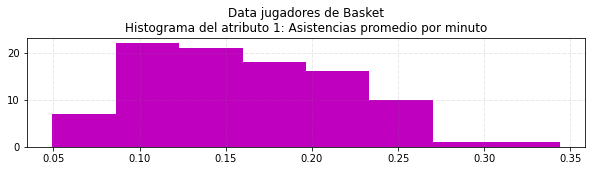

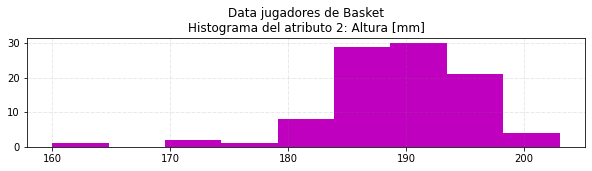

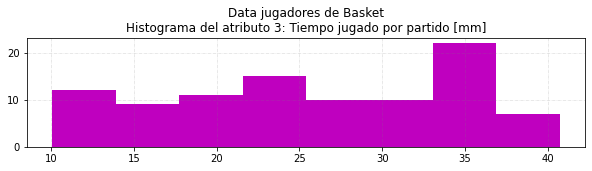

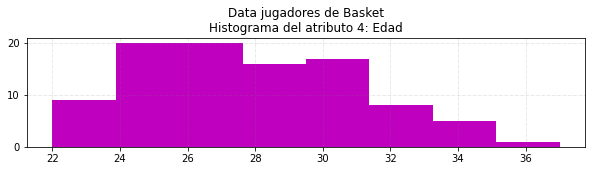

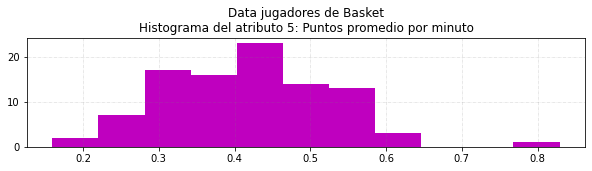

In [28]:
histogrmAllAtriSep(data0_, varnames, title)

De los histogramas mostrados se puede apreciar, como se mencionó antes, claras diferencias de comportamiento en las distribuciones al ser comparadas con una distribución gaussiana. No obstante, el comportamiento es bastante cercano al de una gaussiana, salvo por el atributo "Tiempo jugado por partido", que presenta una distribución más similar a una distribución normal.

Con el fin de estudiar la relación entre variables, se procede a mostrar los diagramas de dispersión de cada atributo respecto a los demás.

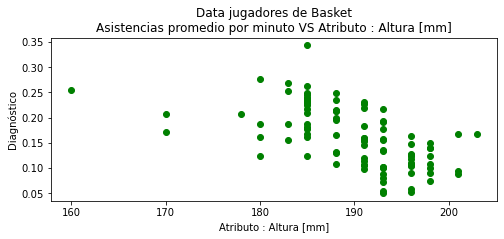

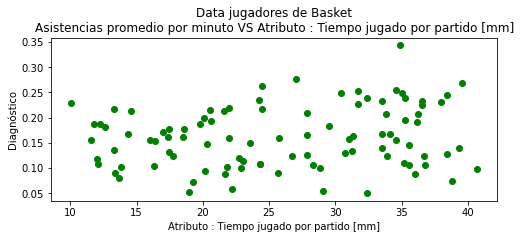

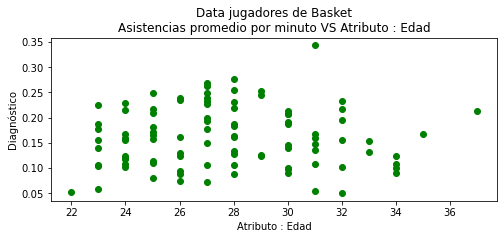

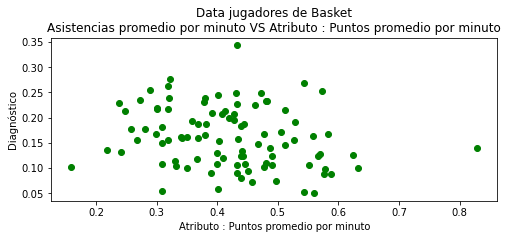

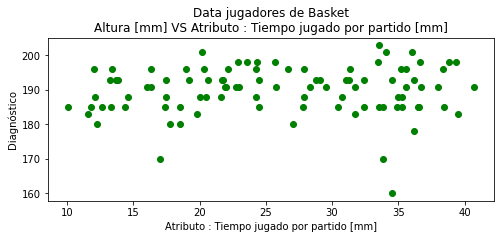

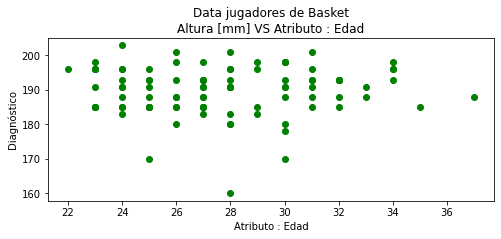

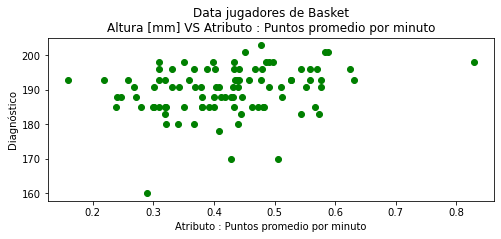

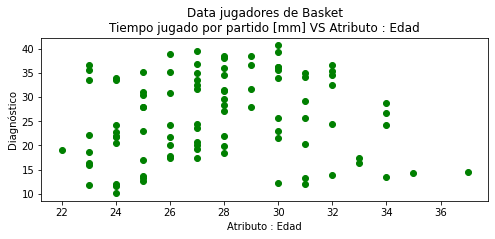

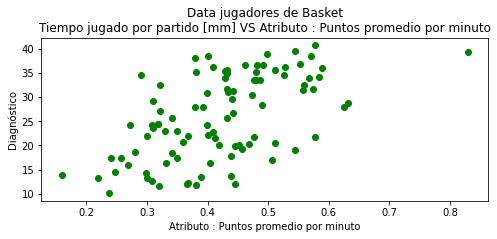

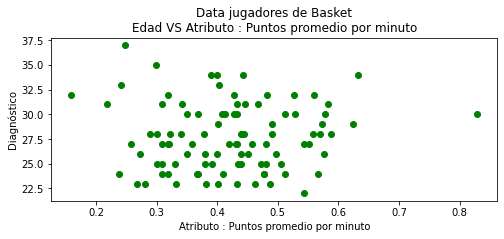

In [29]:
ScatterPlotAlltoAll( data0_, varnames, title )

De los gráficos de dispersión presentados anteriormente, algunos atributos poseen una tendencia en su comportamiento (no del todo definida), mientras que otros simplemente no parecen tener una correlación directa entre los valores de sus muestras.

Para validar los niveles de correlación entre cada atributo, se procede a calcular la correlación de Pearson y presentar los resultados en gráficos de barras. La expresión matemática de la correlación de Pearson se muestra a continuación.
\begin{align*}
	r_{x,y} = \frac{ \sum_{i=0}^N{ {\sigma}_x {\sigma}_y } }{N}
\end{align*}

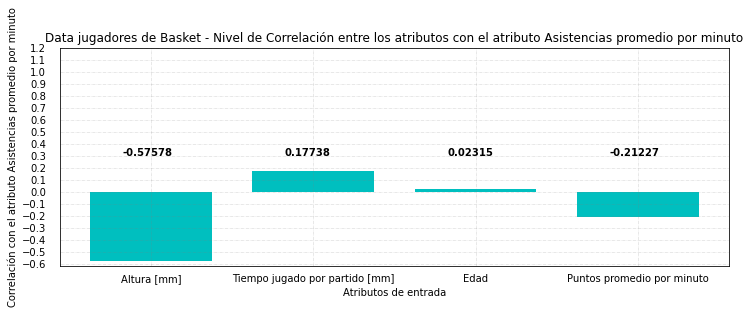

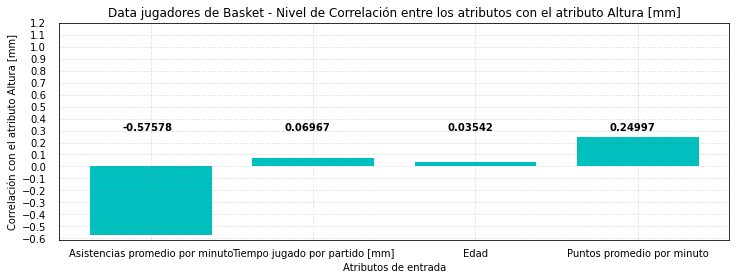

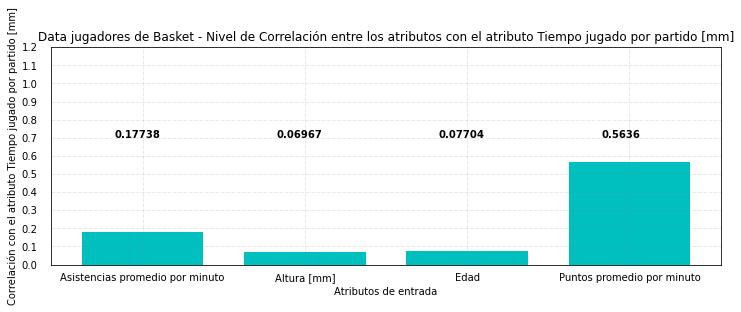

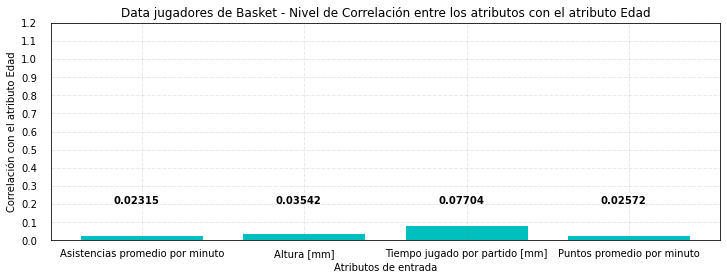

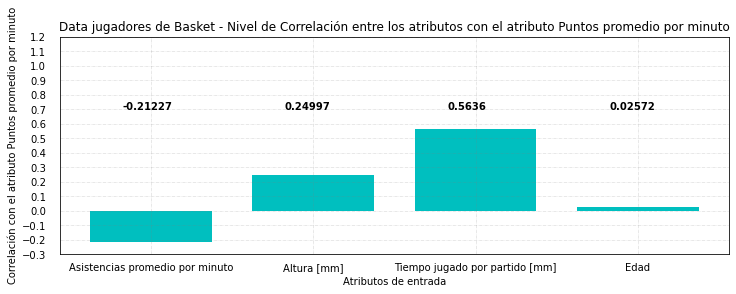

In [30]:
#correlación de Pearson
data0_.dataCorr_ = np.corrcoef(np.transpose(data0_))

# plot de la correlación
barPlotAlltoAll( data0_.dataCorr_ , varnames , title )

Del proceso anterior, se aprecian bajos niveles de correlación entre los diferentes atributos, estando casi todos por debajo de 0.26, salvo 2 casos donde la magnitud de la correlación supera los 0.55: la correlación entre los atributos "Tiempo jugado por partido" y "Puntos promedios por partido", que es de 0.56360; y la correlación entre los atributos "Altura" y "Asistencias promedio por minuto", que es de -0.57578. Esto refleja la baja asociación (similitud) que existe entre los atributos de la data, señalando la pseudo independencia de los mismos.

A continuación, se procede a implementar un procesamiento de la data que garantice la estandarización de los valores de la misma al momento de ser introducidos en el modelo.

\vspace{1cm} 
\section{\bfseries\scshape\Large Procesamiento de la Data}

Para este caso, se considera trabajar con dos conjunto de datos: uno incluyendo los valores atípicos y otro sin considerar los valores atípicos, ambos transformados y estandarizados.

\vspace{1cm} 
\subsection{\scshape\large Sustracción de valores atípicos}

La extracción de valores atípicos se realizará usando el criterio IQR

In [31]:
data0_.Q1_, data0_.Q2_, data0_.Q3_, data0_.IQR_ = IQRparamCalc( data0_ )

Q1 de los atributos es:
[1.09825e-01 1.85000e+02 1.88525e+01 2.50000e+01 3.38425e-01]

Q2 de los atributos es:
[1.58400e-01 1.91000e+02 2.57100e+01 2.70000e+01 4.28250e-01]

Q3 de los atributos es:
[2.09475e-01 1.96000e+02 3.39350e+01 3.00000e+01 4.83075e-01]

IQR de los atributos es:
[9.96500e-02 1.10000e+01 1.50825e+01 5.00000e+00 1.44650e-01]



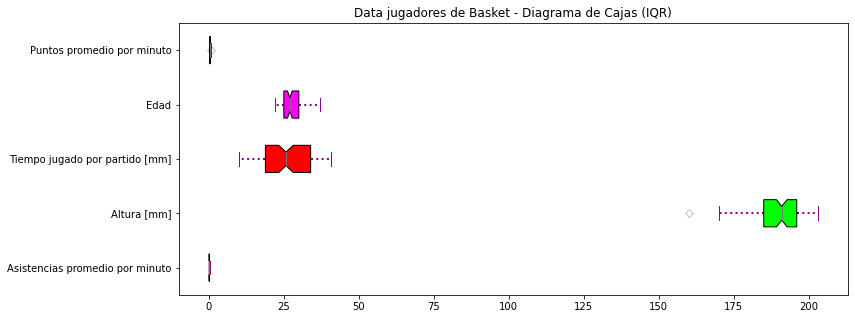

In [32]:
BoxPlotAllin1( data0_, varnames, title)

Resulta difícil de apreciar el diagrama de caja de todos los atributos debido a su diferencia en órdenes de magnitud, por lo que resulta conveniente realizar cada diagrama de caja de cada atributo por separado.

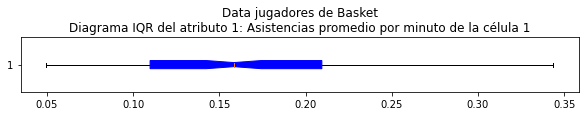

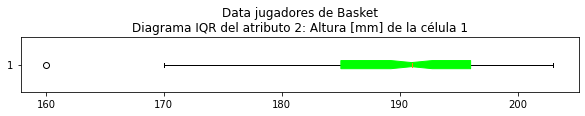

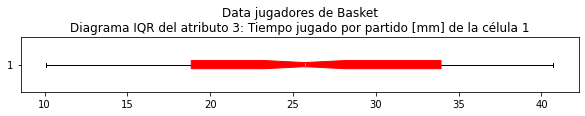

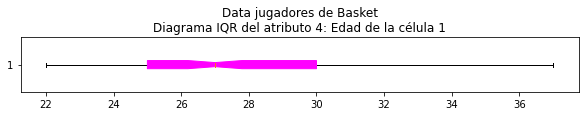

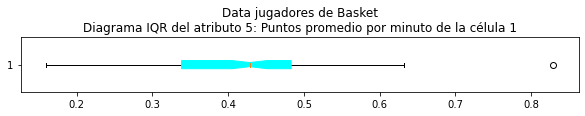

In [33]:
BoxPlotSep( data0_, varnames, title)

De los diagramas de cajas independientes se logra apreciar que solo existen 2 valores atípicos, siendo uno relativamente bajo en altura y otro muy alto en puntajes promedios por minuto. Puede que la segunda muestra atípica sea mejor conservarla; no obstante, como se mencionó antes, en el presente escrito se ejecutan los modelos tanto con la data completa como con la data sin valores atípicos a modo de comparar.

A continuación, se crea el resgistro de la data sin valores atípicos.

In [34]:
data1 = AtipValueRemv( data0_ )
data1_ = StatsArr( data1 )

\vspace{1cm}
\subsection{\scshape\large Transformación de la data}

Como todos los atributos poseen valores estrictamente positivos, se opta por implementar la transformada boxcox sobre la data. La misma viene descrita por la ecuación:
\begin{align*}
	u = 
  \begin{cases} \begin{array}{l}
     \ln(y) \quad sí \quad  \lambda = 0 \\[5pt]
     \frac{(y^{\lambda}-1)}{\lambda} \quad sí \quad  \lambda \neq 0
  \end{array}	\end{cases}
\end{align*}

In [35]:
# Se inicializa el vector data completa transformada
data0t_ = StatsArr( np.copy( data0_ ) )

# Se transforma la data completa
data0t_ , data0t_.Lambdas = boxcox_transform( data0_ )

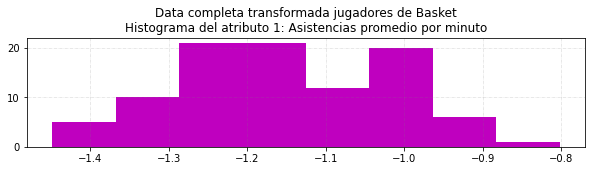

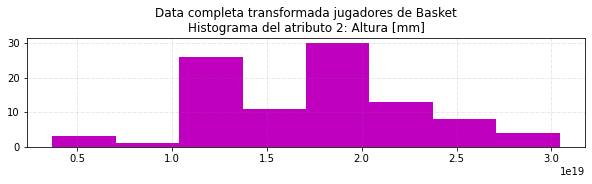

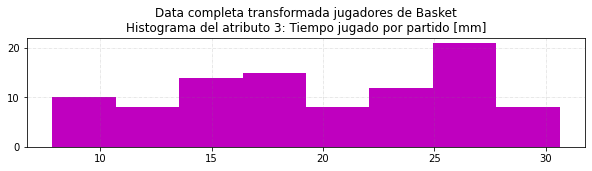

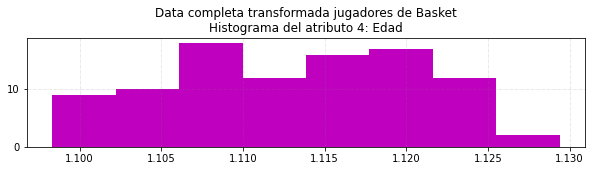

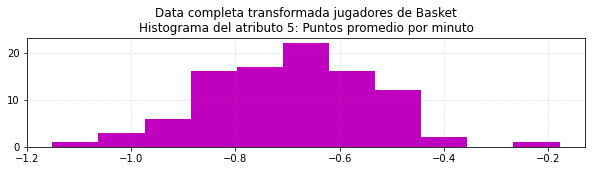

In [36]:
title1 ='Data completa transformada jugadores de Basket'
histogrmAllAtriSep(data0t_, varnames, title1)

Al transformar la data, se aprecia una mejora en el comportamiento ya que la distribución de cada atributo es mucho más similar a una gaussiana.

Ahora se transforma la data sin valores atípicos.

In [37]:
# Se inicializa el vector data sin valores atípicos transformada
data1t_ = StatsArr( np.copy( data1_ ) )

# Se transforma la data sin valores atípicos
data1t_ , data1t_.Lambdas = boxcox_transform( data1_ )

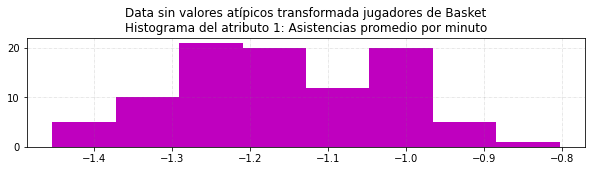

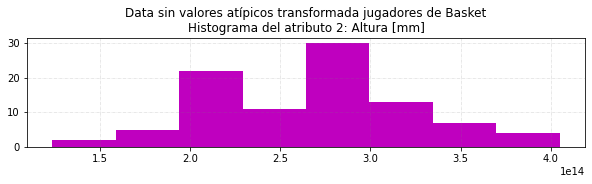

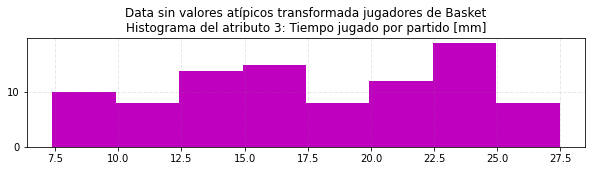

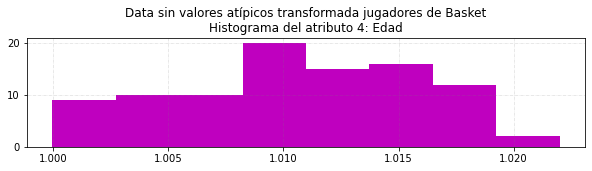

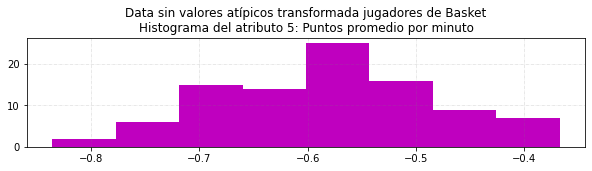

In [38]:
title2 ='Data sin valores atípicos transformada jugadores de Basket'
histogrmAllAtriSep(data1t_, varnames, title2)

La transformación de la data sin valores atípicos presenta resultados ligeramente mejores en dos de los atributos, lo que es consecuencia de la sustracción de valores atípicos (que fueron 2). Sin embargo, el resto de los atributos se mantienen iguales.

\vspace{1cm} \subsection{\scshape\large Estandarización de la data}

Con la finalidad de mantener un mismo rango de valores numéricos, se procede a estandarizar la data transformada. De esta forma, se evita posibles incrementos en desviaciones, diferencia entre medias y otros que pueden ser productos de la transformación realizada.

La metodología de estandarización a utilizar es Z-Score, cuya ecuación es:
\begin{align*}
    x_N = \frac{(x - \mu)}{ \sigma }
\end{align*}

In [39]:
# Se inicializa el vector data completa estandarizada
data0n_ = StatsArr( np.copy( data0t_ ) )

# Se estandariza la data completa
data0n_ = stats.zscore( data0t_, axis = 0 )

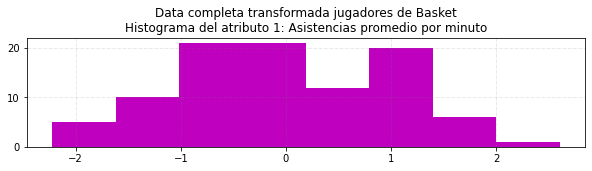

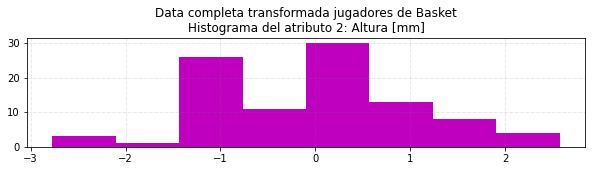

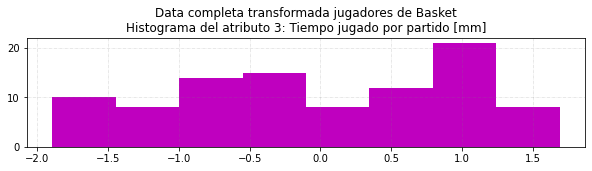

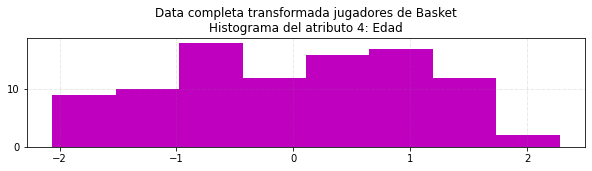

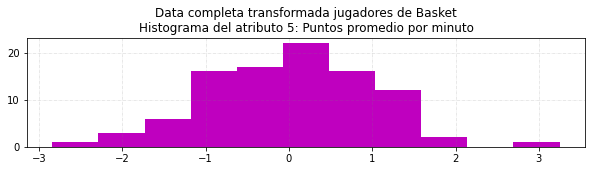

In [40]:
title3 ='Data completa estandarizada jugadores de Basket'
histogrmAllAtriSep(data0n_, varnames, title1)

La estandarización garantiza que los valores de todos los atributos se encuentren dentro del rango $[-2.85,3.25]$.

In [41]:
# Se inicializa el vector data sin valores atípicos estandarizada
data1n = StatsArr( np.copy( data1t_ ) )

# Se estandariza la data sin valores atípicos
data1n_ = stats.zscore( data1t_, axis = 0 )

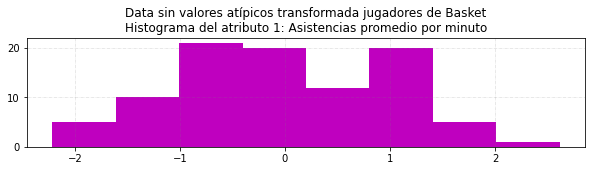

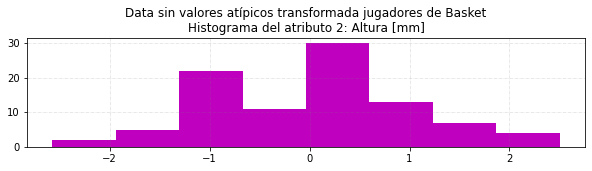

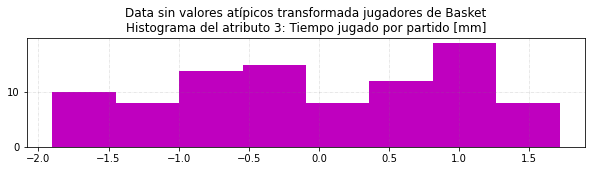

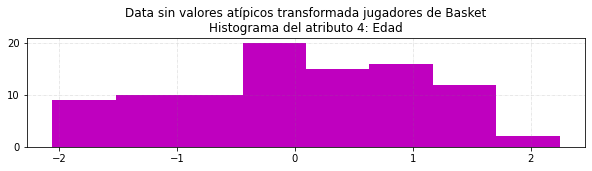

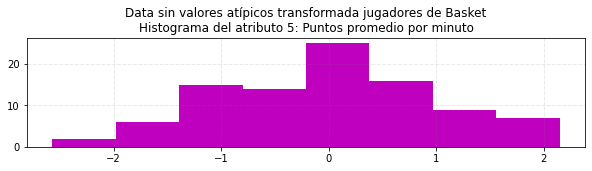

In [42]:
title4 ='Data sin valores atípicos estandarizada jugadores de Basket'
histogrmAllAtriSep(data1n_, varnames, title2)

Al no incluir los valores atípicos, la estandarización garantiza que los valores de todos los atributos se encuentren dentro del rango $[-2.58,2.62]$.

\vspace{1cm} \section{\bfseries\scshape\Large Modelo de clustering}

Para la presente prueba, se implementan dos modelos de agrupamiento: agrupamiento jerárquico y agrupamiento por el algoritmo K-Means.

El objetivo es comparar los resultados de ambas metodologías para determinar una cantidad de grupos óptimo para la data utilizada. En ambos casos, se trata la data completa y la data sin valores atípicos.

\vspace{1cm} \subsection{\scshape\large Hierachical Clustering}

Para el caso de agrupamiento jerárquico, se procede a implementar 2 comandos provenientes de dos bibliotecas diferentes de python:
\begin{itemize}
    \item[$\circ$] AgglomerativeClustering de la biblioteca Scikit-Learn.
    \item[$\circ$] Linkage de la biblioteca Sci-Py.
\end{itemize}
El objetivo de esto es comparar los resultados de ambos métodos al momento de implementar el agrupamiento jerárquico.

\vspace{1cm} 
\subsubsection{\scshape\large Modelo con data completa}

la primera configuración a usar en ambos parámetros es la implementación del método "ward" con métrica "euclidiana".

La expresión matemática del método "ward" se muestra a continuación:
\begin{align*}
    d(u,v) = \sqrt{\frac{|v|+|s|} {T}d(v,s)^2 + \frac{|v|+|t|} {T}d(v,t)^2 - \frac{|v|} {T}d(s,t)^2}
\end{align*}

\begin{itemize}
    \item[$\circ$] comando: AgglomerativeClustering
\end{itemize}

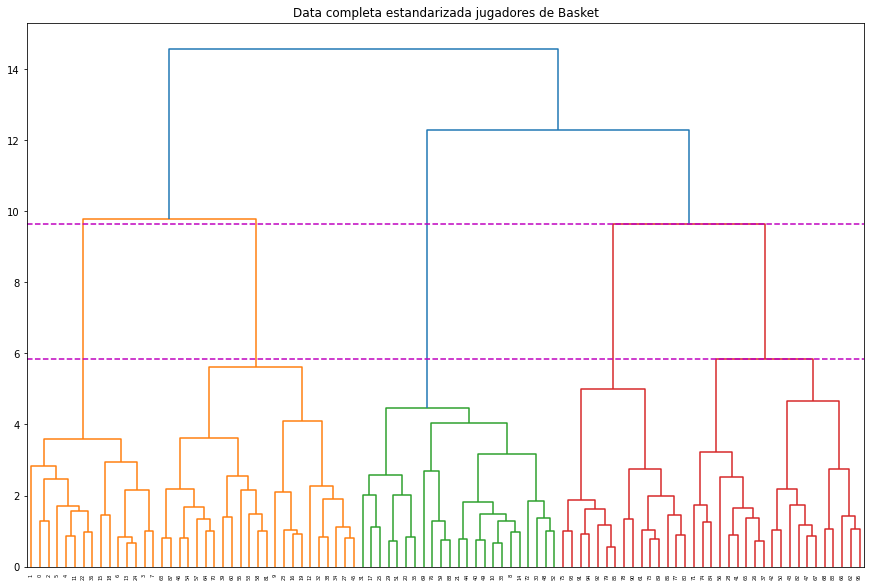

In [43]:
# modelo
model0A = hierarchicalClustering( data0n_, Nclusters=None, DistanceThreshold=0, Affinity='euclidean', Linkage='ward' )

# dendrograma
lm0A = DendrogramAggloH( model0A, title3 )

\begin{itemize}
    \item[$\circ$] comando: Linkage
\end{itemize}

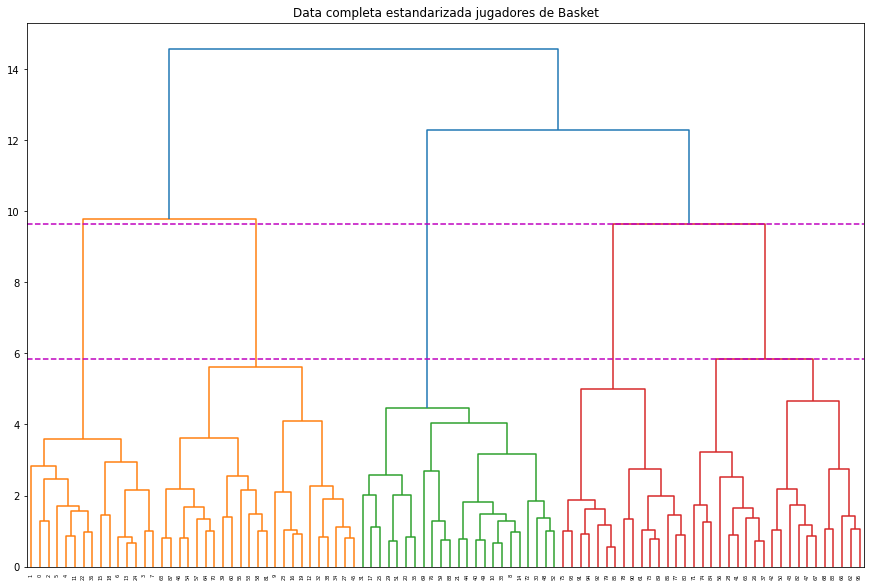

In [44]:
# modelo y dendrograma
model0B = DendogramLinkage( data0n_, title3 ) #, Method = 'ward', Metric = 'euclidean'  )

Ahora se procede a implementar la configuración de método "single" con métrica "euclidiana".

La ecuación del método single es:
\begin{align*}
    d(u,v) = \min(dist(u[i],v[j]))
\end{align*}

\begin{itemize}
    \item[$\circ$] comando: AgglomerativeClustering
\end{itemize}

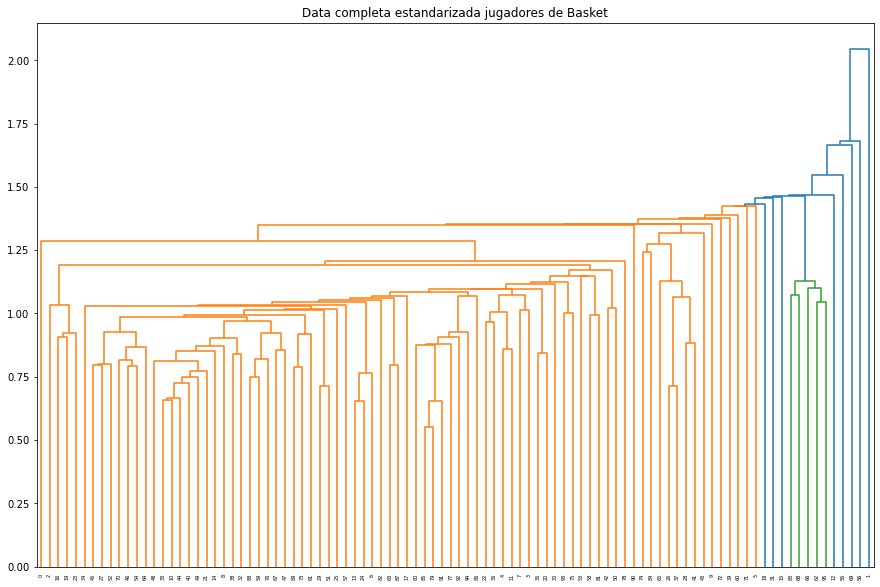

In [45]:
# modelo
model1A = hierarchicalClustering( data0n_, Nclusters=None, DistanceThreshold=0, Affinity='euclidean', Linkage='single' )

# dendrograma
lm1A = DendrogramAggloH( model1A, title3 )

\begin{itemize}
    \item[$\circ$] comando: Linkage
\end{itemize}

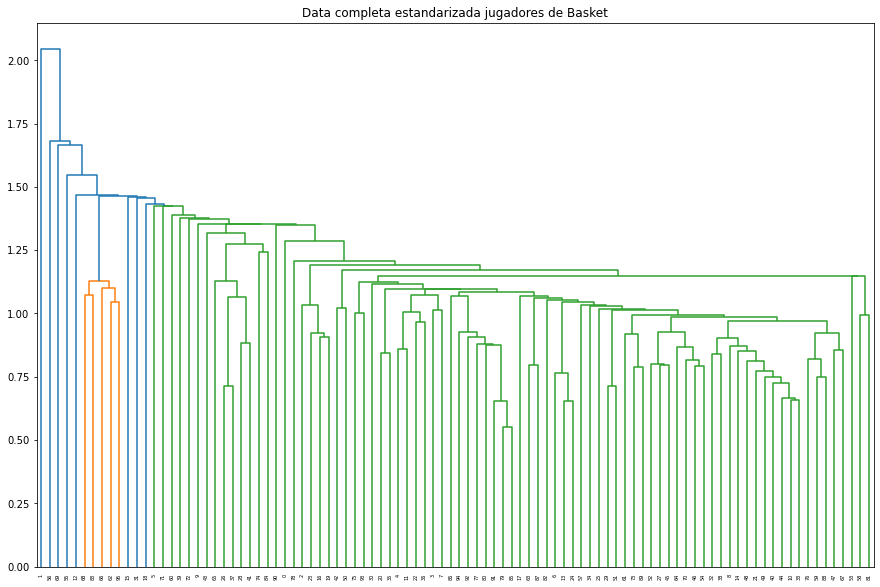

In [46]:
# modelo y dendrograma
model1B = DendogramLinkage( data0n_, title3, Method = 'single', Metric = 'euclidean' )

Luego se implementa la configuración de método "average" con métrica "euclidiana".

La expresión de este método es:
\begin{align*}
    d(u,v) = \sum_{ij} \frac{d(u[i], v[j])} {(|u|*|v|)}
\end{align*}

\begin{itemize}
    \item[$\circ$] comando: AgglomerativeClustering
\end{itemize}

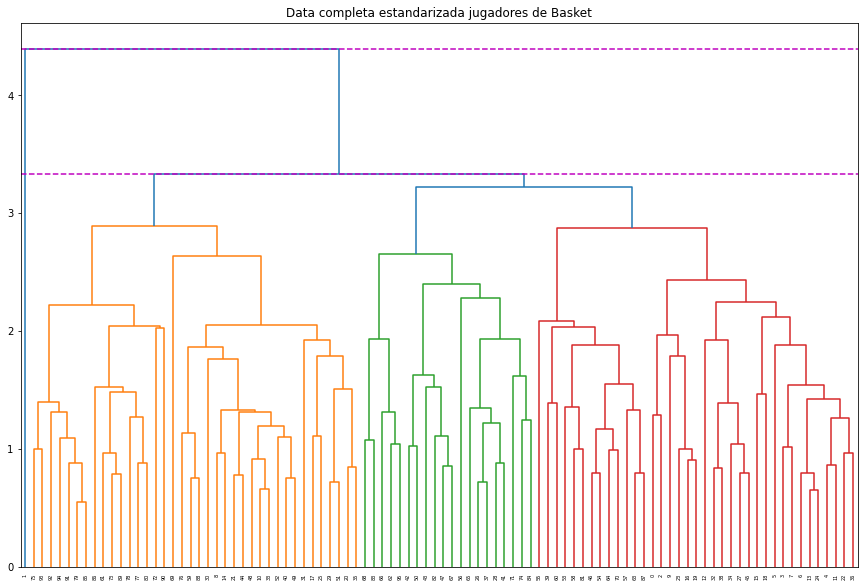

In [47]:
# modelo
model2A = hierarchicalClustering( data0n_, Nclusters=None, DistanceThreshold=0, Affinity='euclidean', Linkage='average' )

# dendrograma
lm2A = DendrogramAggloH( model2A, title3 )

\begin{itemize}
    \item[$\circ$] comando: Linkage
\end{itemize}

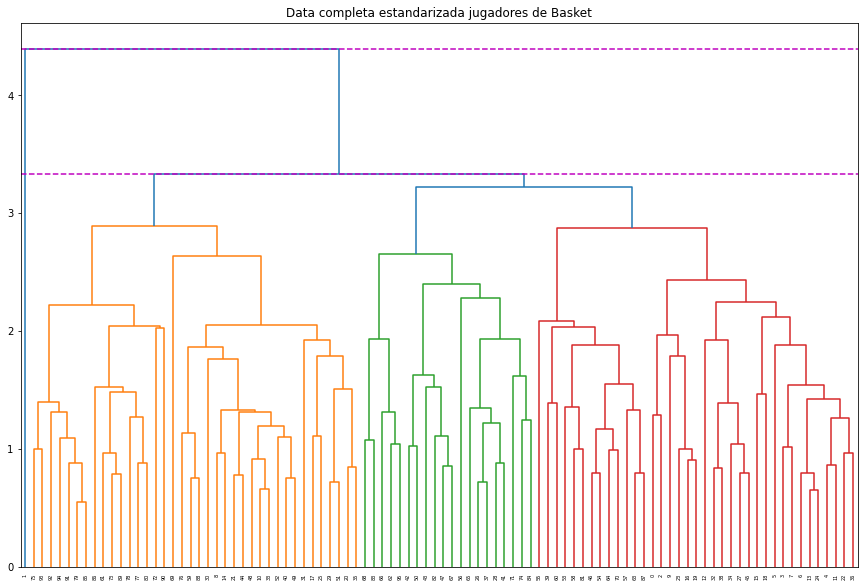

In [48]:
# modelo y dendrograma
model2B = DendogramLinkage( data0n_, title3, Method = 'average', Metric = 'euclidean' )

Por último, se implementa la configuración de método "Complete" con métrica "euclidiana".

La ecuación para este método se describe a continuación:
\begin{align*}
    d(u, v) = \max(dist(u[i],v[j]))
\end{align*}


\begin{itemize}
    \item[$\circ$] comando: AgglomerativeClustering
\end{itemize}

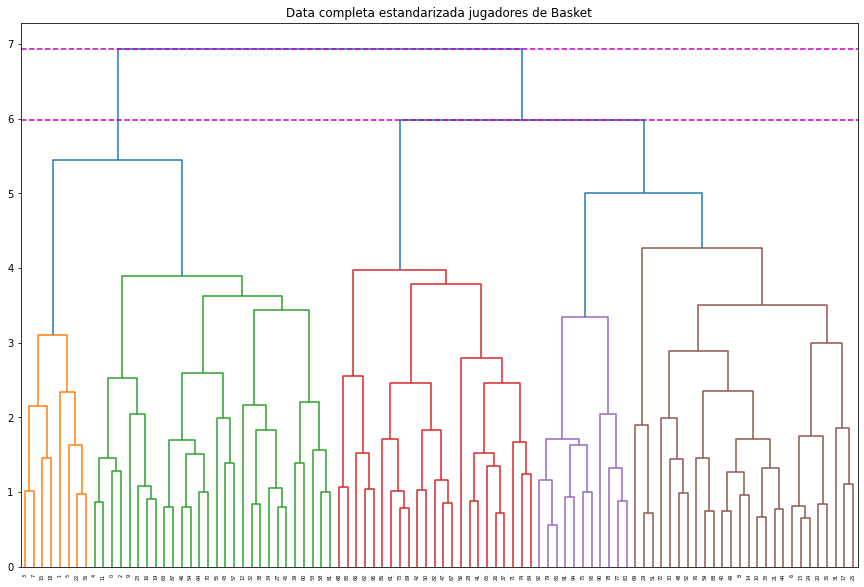

In [49]:
# modelo
model3A = hierarchicalClustering( data0n_, Nclusters=None, DistanceThreshold=0, Affinity='euclidean', Linkage='complete' )

# dendrograma
lm3A = DendrogramAggloH( model3A, title3 )

\begin{itemize}
    \item[$\circ$] comando: Linkage
\end{itemize}

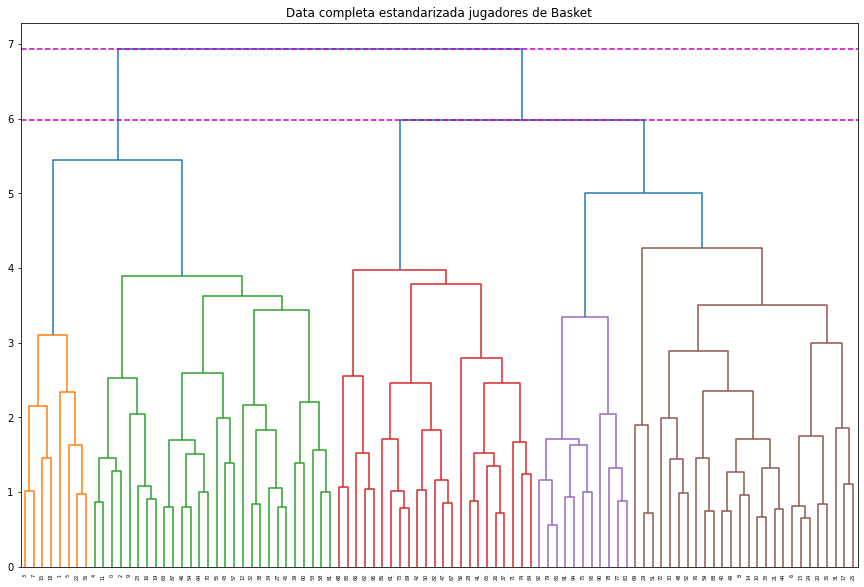

In [50]:
# modelo y dendrograma
model3B = DendogramLinkage( data0n_, title3, Method = 'complete', Metric = 'euclidean' )

Culminado este conjunto de pruebas, se puede concluir que el mejor resultado fue el arrojado por el método ward. 

Es interesante notar que todos los resultados con ambos comandos son iguales, excepto la configuración con el método single, que resulta en el espejo del otro método al ver los gráficos. No obstante, su anatomía sigue siendo la misma y, como se observa, es incapaz de ofercer un grupo que no sea la primera clasificación, lo que carece de generalidad.

No obstante, se realizan diferentes pruebas aplicando un método, en este caso el método "complete", variando diferentes métricas a fin de comparar resultados de las mismas.

\begin{itemize}
    \item[$\circ$] métrica: L2
\end{itemize}

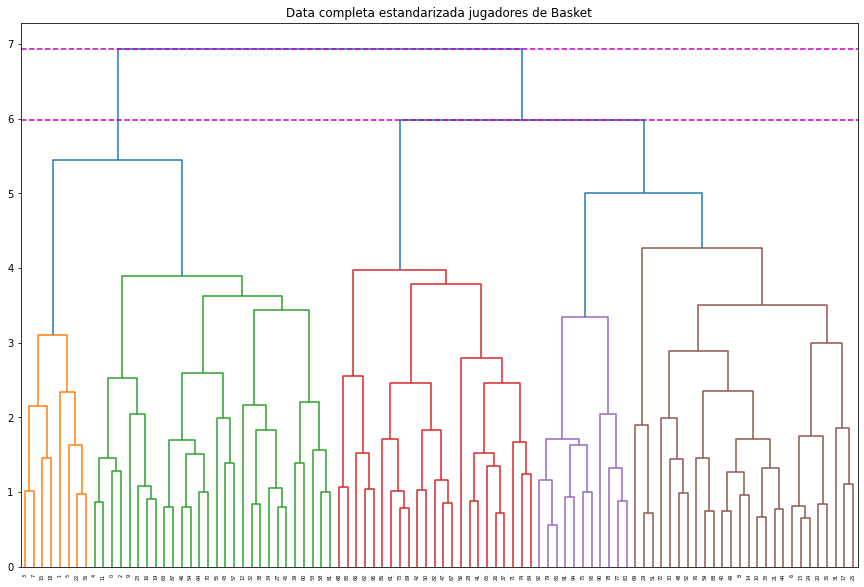

In [51]:
# modelo
model4A = hierarchicalClustering( data0n_, Nclusters=None, DistanceThreshold=0, Affinity='l2', Linkage='complete' )

# dendrograma
lm4A = DendrogramAggloH( model4A, title3 )

\begin{itemize}
    \item[$\circ$] métrica: Manhattan
\end{itemize}

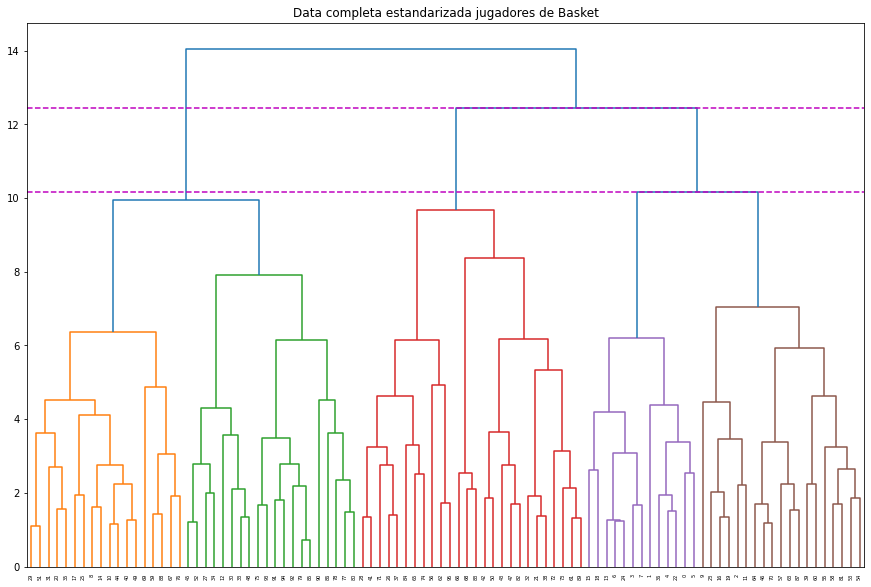

In [52]:
# modelo
model5A = hierarchicalClustering( data0n_, Nclusters=None, DistanceThreshold=0, Affinity='manhattan', Linkage='complete' )

# dendrograma
lm5A = DendrogramAggloH( model5A, title3 )

\begin{itemize}
    \item[$\circ$] métrica: Cosine
\end{itemize}

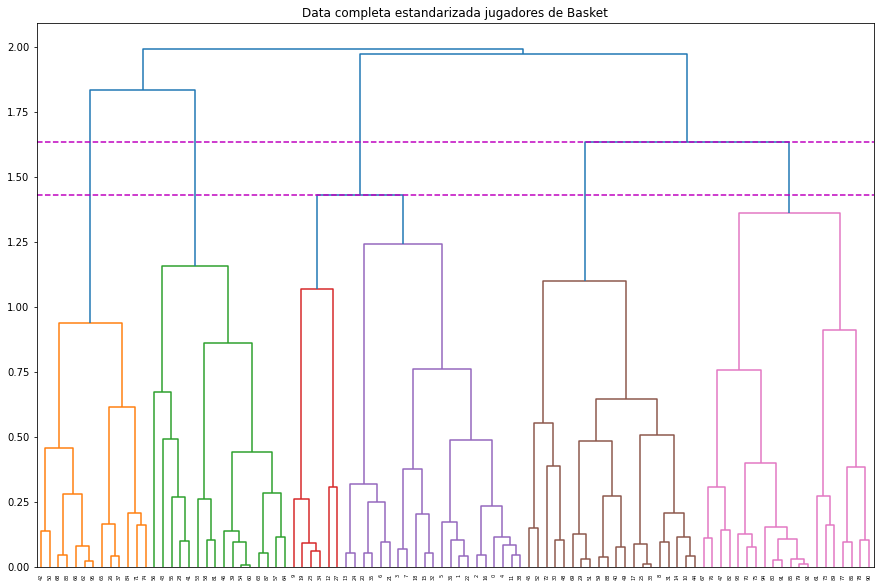

In [53]:
# modelo
model6A = hierarchicalClustering( data0n_, Nclusters=None, DistanceThreshold=0, Affinity='cosine', Linkage='complete' )

# dendrograma
lm6A = DendrogramAggloH( model6A, title3 )

Claramente, los modelos que ofrecen mejores resultados son aquellos cuyas configuraciones corresponden al método "ward" con métrica "euclidiana" y al método "complete" con métrica "cosine".

Sus resultados son los mejores porque permite tener una cantidad de grupos suficiente para mantener la generalidad entre los datos y realmente tener una clasificación sustanciosa, correspondiente a 5 grupos. Para la cantidad de muestras en la data, clasificaciones de 2 o 3 grupos no son suficiente ya que se agrupan muestras diferentes y la generalidad superpone las características principales de varias muestras al ser repartidas en menos grupos.

\vspace{1cm} 
\subsubsection{\scshape\large Modelo con data sin valores atípicos}

Para este caso, solo se probaron las configuraciones que arrojaron los mejores resultados del caso anterior.

\begin{itemize}
    \item[$\circ$] método: ward. métrica: euclidiana
\end{itemize}

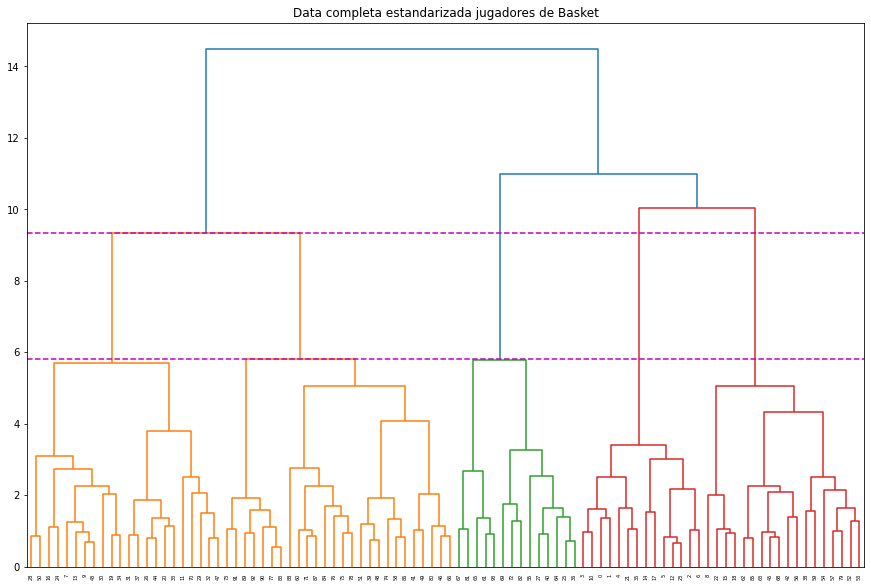

In [83]:
# modelo
model0C = hierarchicalClustering( data1n_, Nclusters=None, DistanceThreshold=0, Affinity='euclidean', Linkage='ward' )

# dendrograma
lm0C = DendrogramAggloH( model0C, title3 )

\begin{itemize}
    \item[$\circ$] método: complete. métrica: cosine
\end{itemize}

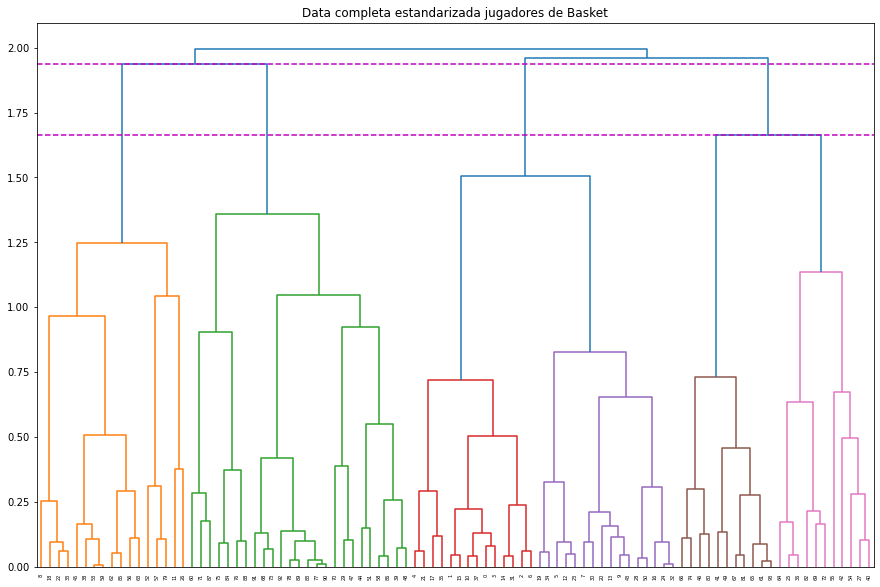

In [186]:
# modelo
model6C = hierarchicalClustering( data1n_, Nclusters=None, DistanceThreshold=0, Affinity='cosine', Linkage='complete' )

# dendrograma
lm6C = DendrogramAggloH( model6C, title3 )

Como se puede apreciar, la sustracción de los valores atípicos no parece tener relevancia al momento de implementar la configuración de método "ward" con métrica "euclidiana"; ya que el resultado sigue siendo 5 grupos. Sin embargo, al implementar la configuración de método "complete" con métrica "cosine" (el segundo mejor resultado obtenido para la data completa), el resultado es 4 grupos en vez de 5 grupos. Esto muestra la relevancia de los valores atípicos al momento de implementar el agrupamiento jerárquico y la robustez del método "ward" para clasificiar, que ha sido el mejor de todos.

\vspace{1cm} \subsection{\scshape\large K-Means}

Al igual que en el caso anterior, se implementa el método tanto para la data completa como para la data sin valores atípicos.

En este caso, solo se hace uso del método ofrecido por la biblioteca Scikit-Learn. Además, se mantuvo un valor específico de la variable "random_state", de manera que se asegurase la misma inicialización "aleatoria" cada vez que se corra el algoritmo, a modo de no obtener resultados diferentes en cada ejecución debido a la inicialización.

\vspace{1cm} 
\subsubsection{\scshape\large Modelo con data completa}

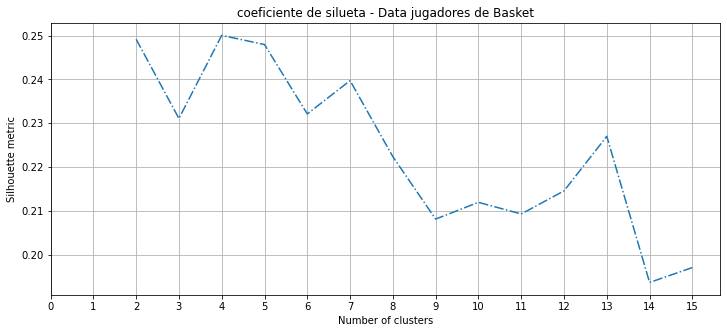

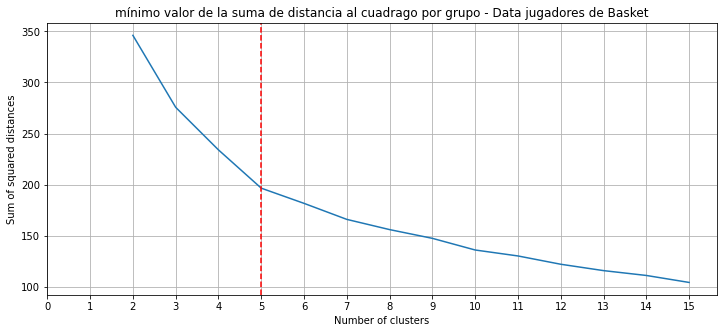

In [198]:
kmodel0A, silhkm0A = KMeansCodo( data0n_, np.arange(2,16), randomState=10 ) 
plt.axvline(x=5, color='r', linestyle = '--')
plt.show()

In [199]:
# diferencia en el valor del coeficiente de silueta para los grupos de interés.
print('dos grupos - 4 grupos = ', silhkm0A[0]-silhkm0A[2])
print('dos grupos - 5 grupos = ', silhkm0A[0]-silhkm0A[3])

dos grupos - 4 grupos =  -0.0008866916640306033
dos grupos - 5 grupos =  0.0012138601803111382


De los resultados del coeficiente de silueta y el mínimo valor de la suma de las distancias al cuadrado, parece que la mejor cantidad de conjuntos de agrupamiento es de 4 o 5. Ciertamente el resultado no es claro ya que el cambio de pendiente en la suma de distancias al cuadrado no es tan pronunciado, por lo que el método del codo no es evidente, a pesar se percibirse una cambio de pendiente ligeramente mayor en el punto asociado a 5 grupos; mientras que al observar los resultado de los coeficientes de silueta, aquellos que resultan ser más parecidos con el primero valor (2 grupos) son 4 grupos (cercano pero mayor) y 5 grupos (cercano pero menor), por lo que ambas pudieran ser válidas.

Sin embargo, al realizar la diferencia de los valores de los coeficientes de siluetas del 4 grupos y 5 grupos respecto a 2 grupos, el valor más cercano resulta ser 4 grupos, por lo que, según este método, 4 grupos es el mejor agrupamiento. Pero, si se considera el resultado obtenido por el método del codo, el resultado debería ser 5 grupos (de forma no explícita).

A continuación, se presentarán las muestras en un gráfico de dos atributos clasificadas de acuerdo a su grupo con color y se muestraran los centroides.

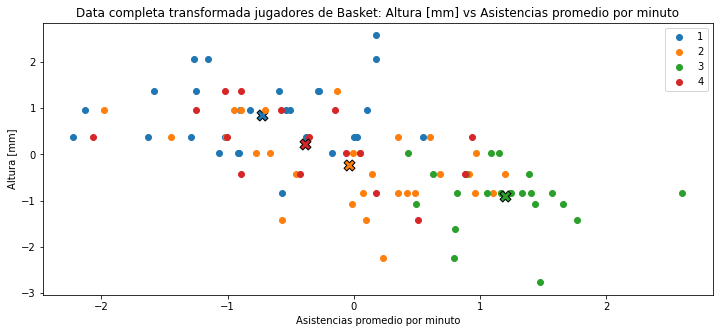

In [226]:
KmScatterPlot( data0n_[:,:2], kmodel0A[2].model_.labels_, kmodel0A[2].model_.cluster_centers_[:,:2], title1, varnames[:2] )

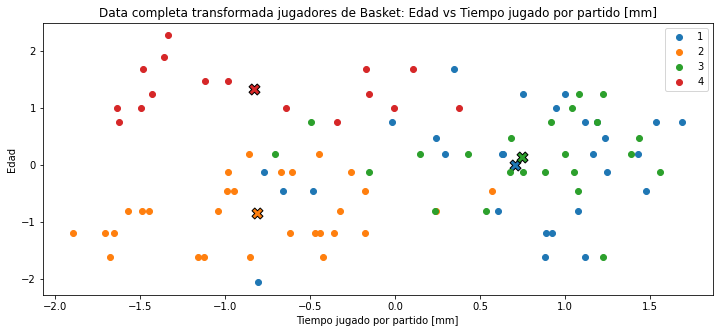

In [227]:
KmScatterPlot( data0n_[:,2:4], kmodel0A[2].model_.labels_, kmodel0A[2].model_.cluster_centers_[:,2:4], title1, varnames[2:4] )

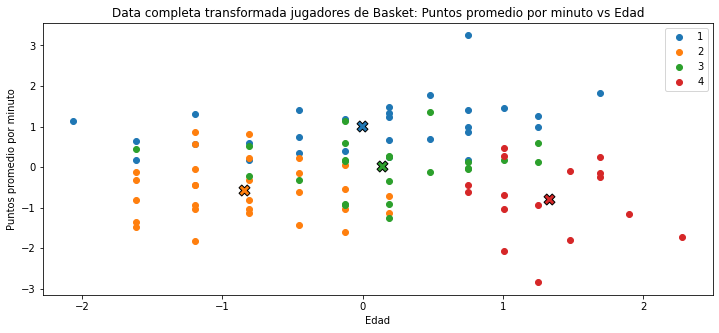

In [228]:
KmScatterPlot( data0n_[:,3:], kmodel0A[2].model_.labels_, kmodel0A[2].model_.cluster_centers_[:,3:], title1, varnames[3:] )

Como es de esperarse, el resultado no es claro en ningún caso ya que os atributos no son medidas espaciales y son más de 3. si bien en algunos gráficos parece haber una mayor concentración de grupos en ciertas regiones, igualmente existe una presencia (mucho menor) de muestras de otros grupos, así como hay muestras de dicho grupo en otras regiones (en cantidades mucho menores), por lo que los gráficos no resultan de mucha utilidad para establecer regiones completamente definidas.

Adicionalmente, se grafica los diagramas de disperción para el agrupamiento de 5 clusters.

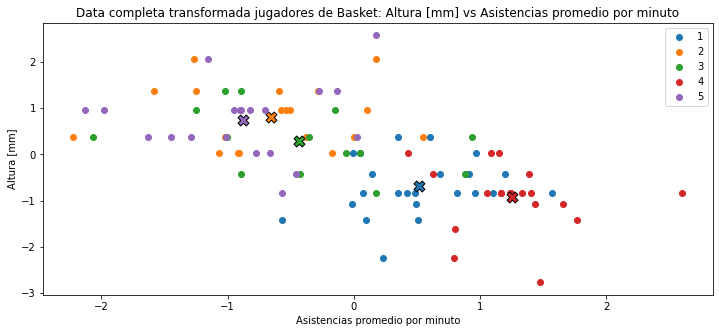

In [229]:
KmScatterPlot( data0n_[:,:2], kmodel0A[3].model_.labels_, kmodel0A[3].model_.cluster_centers_[:,:2], title1, varnames[:2] )

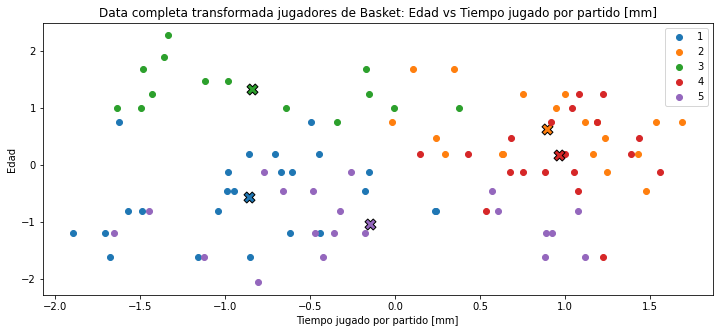

In [230]:
KmScatterPlot( data0n_[:,2:4], kmodel0A[3].model_.labels_, kmodel0A[3].model_.cluster_centers_[:,2:4], title1, varnames[2:4] )

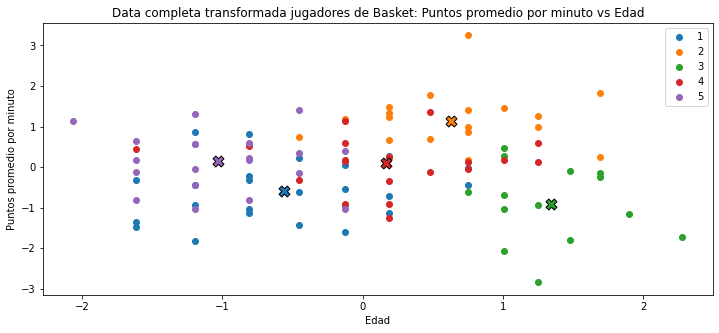

In [231]:
KmScatterPlot( data0n_[:,3:], kmodel0A[3].model_.labels_, kmodel0A[3].model_.cluster_centers_[:,3:], title1, varnames[3:] )

\vspace{1cm} 
\subsubsection{\scshape\large Modelo con data sin valores atípicos}

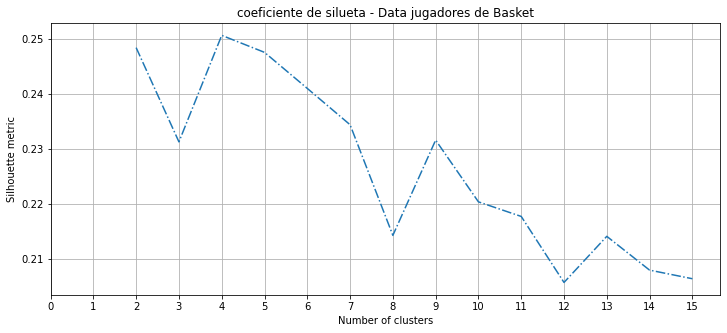

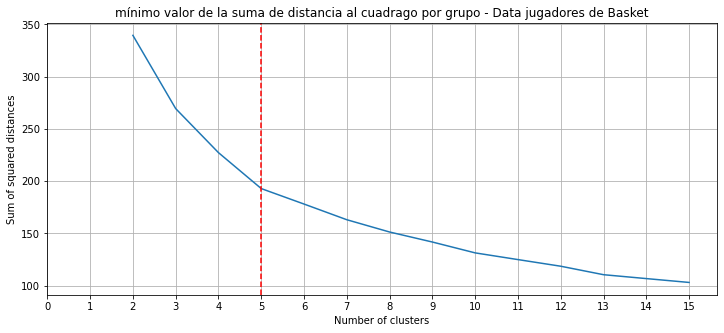

In [178]:
kmodel1A, silhkm1A = KMeansCodo( data1n_, np.arange(2,16), randomState=10 ) 
plt.axvline(x=5, color='r', linestyle = '--')
plt.show()

In [195]:
# diferencia en el valor del coeficiente de silueta para los grupos de interés.
print('dos grupos - 4 grupos = ', silhkm1A[0]-silhkm1A[2])
print('dos grupos - 5 grupos = ', silhkm1A[0]-silhkm1A[3])

dos grupos - 4 grupos =  -0.002236314050078042
dos grupos - 5 grupos =  0.000856753056259818


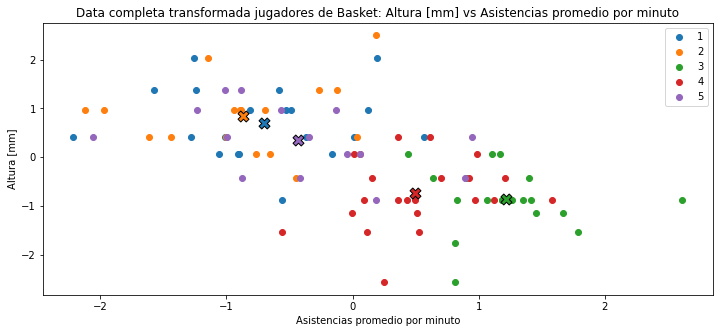

In [225]:
KmScatterPlot( data1n_[:,:2], kmodel1A[3].model_.labels_, kmodel1A[3].model_.cluster_centers_[:,:2], title1, varnames[:2] )

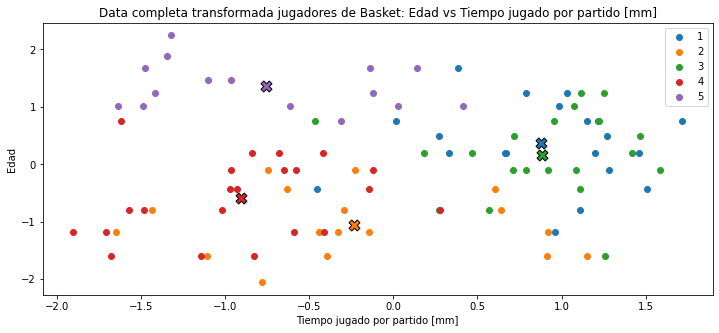

In [224]:
KmScatterPlot( data1n_[:,2:4], kmodel1A[3].model_.labels_, kmodel1A[3].model_.cluster_centers_[:,2:4], title1, varnames[2:4] )

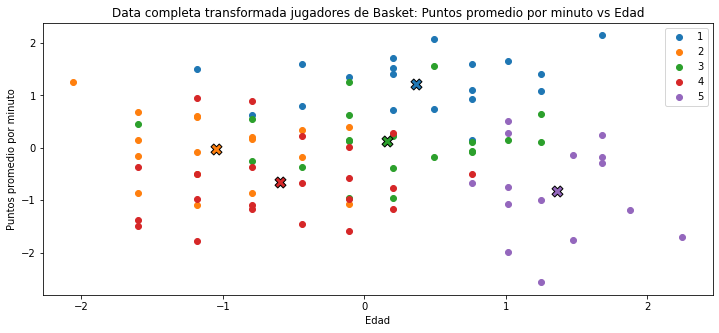

In [223]:
KmScatterPlot( data1n_[:,3:], kmodel1A[3].model_.labels_, kmodel1A[3].model_.cluster_centers_[:,3:], title1, varnames[3:] )

Para el caso de la data sin valores atípicos, los resultados del coeficiente de silueta y la suma de las distancias al cuadrado tienen un comportamiento similar, pero no exactamente igual: Siguiendo el mismo criterio de comparar los coeficientes de silueta de 4 grupos y 5 grupos con el de 2 grupos, en este caso se obtiene que el coeficiente de silueta de 5 grupos es más cercano al de 2 grupos que el coeficiente de silueta de 4 grupos, por lo que en este caso el mejor agrupamiento son 5 grupos.

Al visualizar los diagramas de dispersión de las muestras clasificadas en 5 grupos, se observa la distribución de las muestras es claramente diferente al arrojado con la data completa.

\newpage

\vspace{1cm} 
\section{\bfseries\scshape\Large Conclusiones}

De los modelos estudiados anteriormente, se pudo apreciar el proceso de clasificación de la data de diferentes maneras y cómo la configuración de diferentes parámetros, así como el uso de data completa y data sin valores atípicos, alteran fuertemente el resultado de la clasificación.

El agrupamiento jerárquico presenta la ventaja de ofrecer una solución que, de acuerdo a la configuración aplicada, es la más apropiada. La misma se determina por la cantidad de líneas de grafos comprendidas en la mayor distancia entre dos conjuntos. En los diversos experimentos se mostró la influencia de los diferentes métodos y las métricas aplicadas, en los que se pudo determinar que el método más robusto es “Ward”, cuya única métrica aceptable para los comandos usados es euclidiana, ya que fue el único método que, tanto para la data completa como para la data sin valores atípicos, mantuvo el resultado: 5 grupos. 

No obstante, existen otras combinaciones que arrojan buenos resultados, como usar el método “complete” con métrica “cosine”, que mantuvo el resultado de 5 grupos para la data completa, pero redujo el resultado a 4 grupos al usar la data sin valores atípicos. Esto en sí mismo refleja lo sensible de algunos métodos ante los valores atípicos y la importancia del criterio del usuario para determinar el resultado apropiado.

Por otro lado, el método K-Means requiere una preasignación de la cantidad de grupos a crear para funcionar, lo que necesariamente introduce un sesgo de acuerdo a la consideración del usuario. No obstante, se puede implementar el algoritmo para diferentes cantidades de conjuntos a modo de comparar los resultados de cada agrupamiento. Este algoritmo tiende a variar los resultados cada vez que es ejecutado debido a lo sensible del mismo a la inicialización. Razón por la cual, se introdujo un valor específico de “random_state”, de manera de garantizar la misma inicialización “aleatoria” para cada iteración, lo que permitiría comparar los resultados haciendo uso de un criterio más apropiado. Adicionalmente, se incluyó el coeficiente de silueta como medida de comparación.

El resultado de aplicar el método K-Means a la data completa fue 4 grupos; aunque el agrupamiento de 5 también fue bastante prometedor. Por otro lado, al usar este método con la data sin valores atípicos, resultó ser mejor el resultado de 5 grupos respecto al de 4 grupos. Es importante aclarar que en ambos casos se podía considerar los resultados de 4 grupos y 5 grupos como apropiados debido a la baja diferencia en los coeficientes de silueta respecto al resultado de 2 grupos, usado como referencia. Si se observa el método del codo, realmente no es claro la posición en la que se presenta el cambio de pendiente abrupto, pero se nota un cambio de pendiente ligeramente mayor en la posición asociada a 5 grupos, razón por la que se optó por la misma como resultado en ambos casos.

Del trabajo realizado, se determinó que el mejor número de grupos es 5, y en este proceso, el criterio del usuario es esencial para la toma de decisiones con el objetivo de tener un resultado apropiado: que mantenga suficiente generalidad sin perder grupos que puedan representar un sector importante de información. Esto es importante para la selección del mejor equipo de baloncesto, ya que se pudiera agrupar los miembros de mejor desempeño en una clasificación propia, como los mejores prospectos para formar un equipo. Así mismo, se pudiera no solo agrupar por desempeño total sino por desempeño en ciertas áreas de interés a modo de seleccionar los mejores jugadores que compensen las debilidades del resto para tener un equipo fuerte y balanceado. Y como los ejemplos propuestos, se pudieran realizar otros tipos de agrupamiento que brinden información importante a los entrenadores.

Para cerrar, se concluye con el éxito de la actividad, al identificar el agrupamiento apropiado para la data obtenida de acuerdo a similitud general de características y desempeño de los jugadores.
